### LIBRARIES USED

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from boruta import BorutaPy
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE


### LOADING DATASET

In [2]:
bank_lend=pd.read_table('D:\PYTHON PROJECT IMARTICUS/XYZCorp_LendingData.txt',parse_dates=['issue_d'],low_memory=False)


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
bank_lend.head(2)


In [ ]:
bank_lend.shape

In [ ]:
bank_lend.info()

In [ ]:
bank_lend.describe().transpose()

### DATA CLEANING

#### UNIQUE IDENTIFIER


In [ ]:
#bank_lend.term.unique()
#bank_lend.grade.unique()
#bank_lend.sub_grade.unique()
#bank_lend.emp_title.unique()
#bank_lend.emp_length.unique()
#bank_lend.home_ownership.unique()
#bank_lend.verification_status.unique()
#bank_lend.pymnt_plan .unique()
#bank_lend.desc.unique() -confused
#bank_lend.purpose.unique()
#bank_lend.title.unique()
#bank_lend.zip_code.unique()
#bank_lend.addr_state.unique()
#bank_lend.delinq_2yrs.unique()
#bank_lend.earliest_cr_line.unique()
#bank_lend.initial_list_status.unique()
#bank_lend.out_prncp.unique()
#bank_lend.application_type.unique()
#bank_lend.verification_status_joint.unique()
#bank_lend.default_ind.unique()



In [3]:
# Dropping these columns as they are unique identifier.
bank_lend=bank_lend.drop('id',axis=1)
bank_lend=bank_lend.drop('member_id',axis=1)


#### NULL VALUE TREATMENT

In [4]:
# The below columns need to be in object dtype.
# Changing dtype of below columns.
bank_lend.collections_12_mths_ex_med=bank_lend.collections_12_mths_ex_med.astype('object')
bank_lend.next_pymnt_d=bank_lend.next_pymnt_d.astype('object')

In [92]:
# Checking the presence of nulls in a dataset.
bank_lend.isnull().values.any()
# YES, we have null values present in our dataset.

True

In [97]:
# checking the column wise presence of nulls.
bank_lend.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      49443
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             33
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq        439812
open_acc                           0
pub_rec                            0
revol_bal                          0
r

In [98]:
# Checking the percentage of nulls present in each column.
# IF the value exceed 75% then we willremove that column else we will keep the column and will do the imputation.
bank_lend.isnull().sum()/bank_lend.shape[0]*100

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.776261
emp_length                     5.030673
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
pymnt_plan                     0.000000
purpose                        0.000000
title                          0.003855
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000
mths_since_last_delinq        51.381767
open_acc                       0.000000


In [5]:
# Below is the list of columns which have more than 75% nulls. 
columns_to_be_removed=['open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util',
                       'open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m',
                       'annual_inc_joint','dti_joint','verification_status_joint','mths_since_last_major_derog','desc',
                       'mths_since_last_record']
                       
                     

In [6]:
bank_lend=bank_lend.drop(columns_to_be_removed,axis=1)

#### NULL IMPUTATION WIH MEAN AND MODE

In [ ]:
#bank_lend.emp_title.mode()
#bank_lend.emp_length.mode()
#bank_lend.title.mode()
#bank_lend.mths_since_last_delinq.mean()
#bank_lend.revol_util.mean()
#(bank_lend.collections_12_mths_ex_med.mode())
#bank_lend.tot_coll_amt.
#bank_lend.tot_cur_bal.mean()    
#bank_lend.total_rev_hi_lim.mean()
#bank_lend.last_pymnt_d.isnull().sum()

In [7]:
bank_lend.emp_title.fillna('Teacher',inplace=True)
bank_lend.emp_length.fillna('10+ years',inplace=True)
bank_lend.title.fillna('Debt consolidation',inplace=True)
bank_lend.collections_12_mths_ex_med.fillna('0',inplace=True)


In [8]:
bank_lend.tot_coll_amt.fillna(bank_lend.tot_coll_amt.mean(),inplace=True)
bank_lend.tot_cur_bal.fillna(bank_lend.tot_cur_bal.mean(),inplace=True)                 
bank_lend.total_rev_hi_lim.fillna(bank_lend.total_rev_hi_lim.mean(),inplace=True)           
bank_lend.mths_since_last_delinq.fillna(bank_lend.mths_since_last_delinq.mean(),inplace=True)
bank_lend.revol_util.fillna(bank_lend.revol_util.mean(),inplace=True)


In [9]:
bank_lend.next_pymnt_d.fillna('Feb-2016',inplace=True)
bank_lend.last_credit_pull_d.fillna("Jan-2016",inplace=True)
bank_lend.last_pymnt_d.fillna('Jan-2016',inplace=True)

In [17]:
bank_lend.shape
# After data cleaning and null imputation we are left with 51 features.

(855969, 51)

In [104]:
bank_lend.isnull().values.any()

False

##### UNWANTED COLUMNS REMOVAL

In [ ]:
# The below columns do not add any value.

In [10]:
bank_lend=bank_lend.drop('title',axis=1)
bank_lend=bank_lend.drop('emp_title',axis=1)
bank_lend=bank_lend.drop(['zip_code'],axis=1)
bank_lend=bank_lend.drop('next_pymnt_d',axis=1)
bank_lend=bank_lend.drop('last_credit_pull_d',axis=1)
bank_lend=bank_lend.drop('last_pymnt_d',axis=1)
bank_lend=bank_lend.drop('earliest_cr_line',axis=1)
bank_lend=bank_lend.drop('pymnt_plan',axis=1)
bank_lend=bank_lend.drop('collection_recovery_fee',axis=1)
bank_lend=bank_lend.drop('policy_code',axis=1)


In [13]:
bank_lend.shape

(855969, 41)

### EXPLORATORY DATA  ANALYSIS

#### TARGET VARIABLE

In [109]:
# Target Variable
#'default_ind' is our target as that is the dependent variable we are trying to predict.
# The class 0 indicated non defaulter on the other hand class 1 indicates defaulter.

0    809502
1     46467
Name: default_ind, dtype: int64


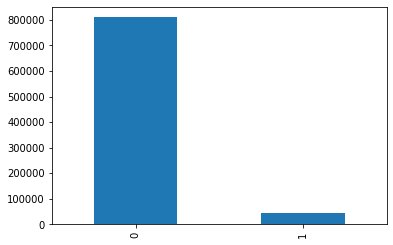

In [110]:
print(bank_lend.default_ind.value_counts())
bank_lend.default_ind.value_counts().plot.bar()


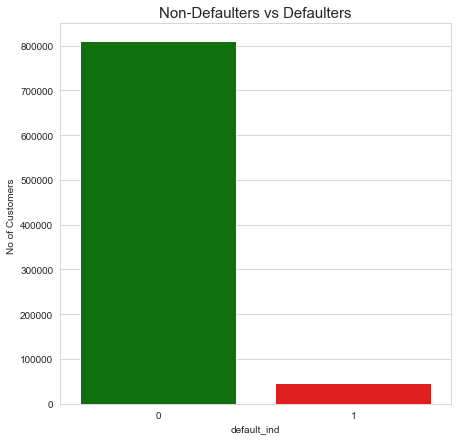

In [111]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,7))
sns.countplot(bank_lend['default_ind'], alpha =1, palette= ['green','red'])
plt.title('Non-Defaulters vs Defaulters',size=15)
plt.ylabel('No of Customers ')
plt.show()

In [ ]:
# The majority of the customers are non defaulter.
# on the  contrary, very few customer has defaulter status.Positive examples = 1533
# Proportion of non-defaulter todefaukter is 5.7%.


##### OBJECT VARIABLES

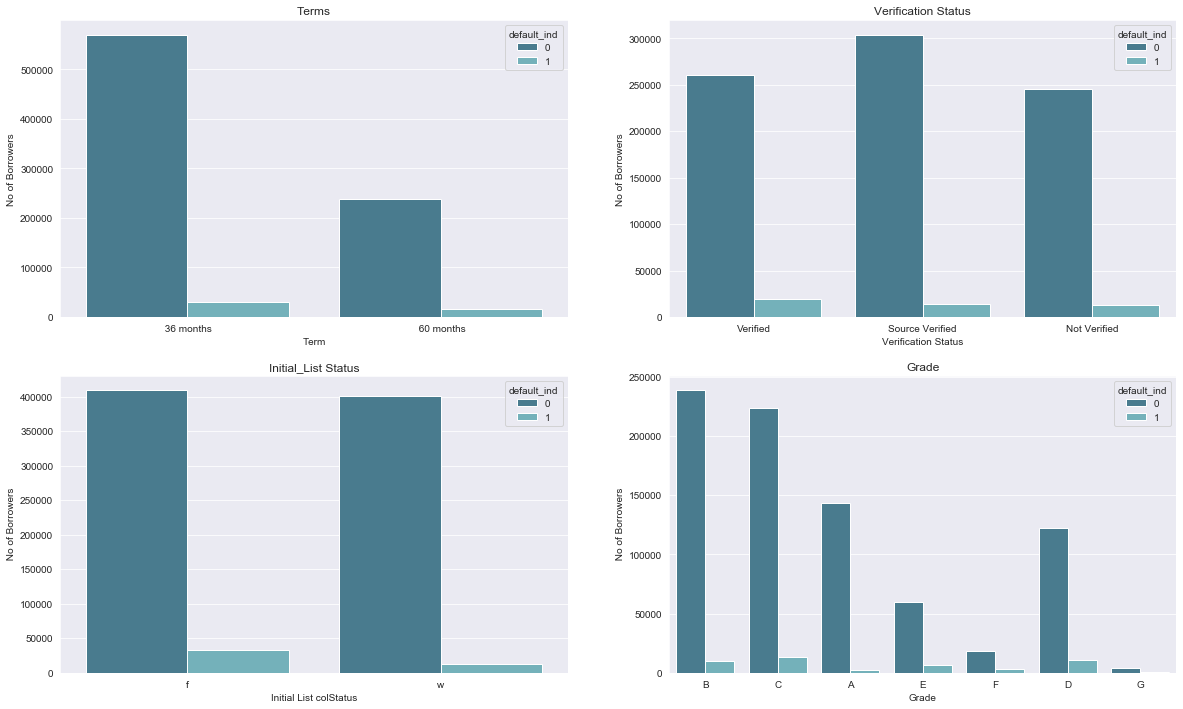

In [15]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(2,2, figsize = (20,12))

# Plot [0]
sns.countplot(bank_lend['term'],hue=bank_lend['default_ind'], palette = 'GnBu_d', ax = axes[0,0])
axes[0,0].set_xlabel('Term')
axes[0,0].set_ylabel('No of Borrowers')
axes[0,0].set_title('Terms')
# Plot [1]
sns.countplot(bank_lend['verification_status'],hue=bank_lend['default_ind'], palette = 'GnBu_d',ax = axes[0,1])
axes[0,1].set_xlabel('Verification Status')
axes[0,1].set_ylabel('No of Borrowers')
axes[0,1].set_title('Verification Status')

sns.countplot(bank_lend['initial_list_status'], hue=bank_lend['default_ind'],palette = 'GnBu_d',ax = axes[1,0])
axes[1,0].set_xlabel('Initial List colStatus')
axes[1,0].set_ylabel(' No of Borrowers')
axes[1,0].set_title('Initial_List Status')

sns.countplot(bank_lend['grade'], hue=bank_lend['default_ind'],palette = 'GnBu_d',ax = axes[1,1])
axes[1,1].set_xlabel('Grade')
axes[1,1].set_ylabel(' No of Borrowers')
axes[1,1].set_title('Grade')


plt.show()

In [ ]:
# Majority of the customers have term of 36 months.(36 months-600221)
# Minority of the customers have term of 60months.(60 months    255748)

# Verification status tells us whethere the income was verified by Lending Club, not verified, or if the income source was verified.
# Most of the income has had its source verified (Source Verified-318178) although 35.7% were not verified (Not Verified-257742).

# Most of the loans are with f (f-442555) status followed by w (w-413414) status.

#  there are total seven grades available.THe XYZ Corp graded most of the loans with B,C,A grade. Whereas , very few loans are graded 
# with the grades E,F,D,G.


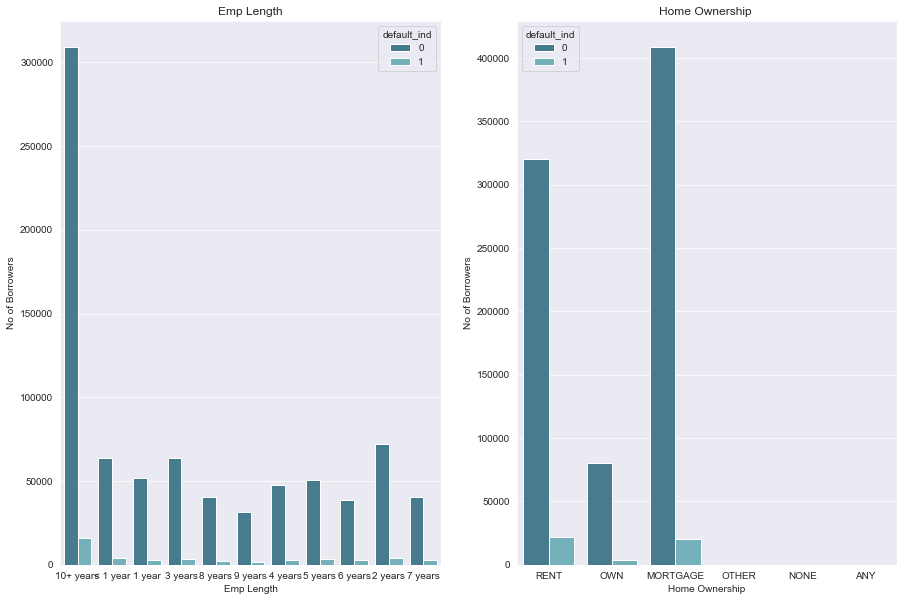

In [16]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,2, figsize = (15,10))

# Plot [0]
sns.countplot(bank_lend['emp_length'], hue=bank_lend['default_ind'], palette = 'GnBu_d', ax = axes[0])
axes[0].set_xlabel('Emp Length')
axes[0].set_ylabel('No of Borrowers')
axes[0].set_title('Emp Length')
# Plot [1]
sns.countplot(bank_lend['home_ownership'], hue=bank_lend['default_ind'], palette = 'GnBu_d',ax = axes[1])
axes[1].set_xlabel('Home Ownership')
axes[1].set_ylabel('No of Borrowers')
axes[1].set_title('Home Ownership ')


plt.show()

In [ ]:
# Most Borrowers either have existing mortgages  or are renting their home .
# There are 11 levels, from  <1 year to 10+ years. the large amount of borrowers have more thea 10+ years of experience.

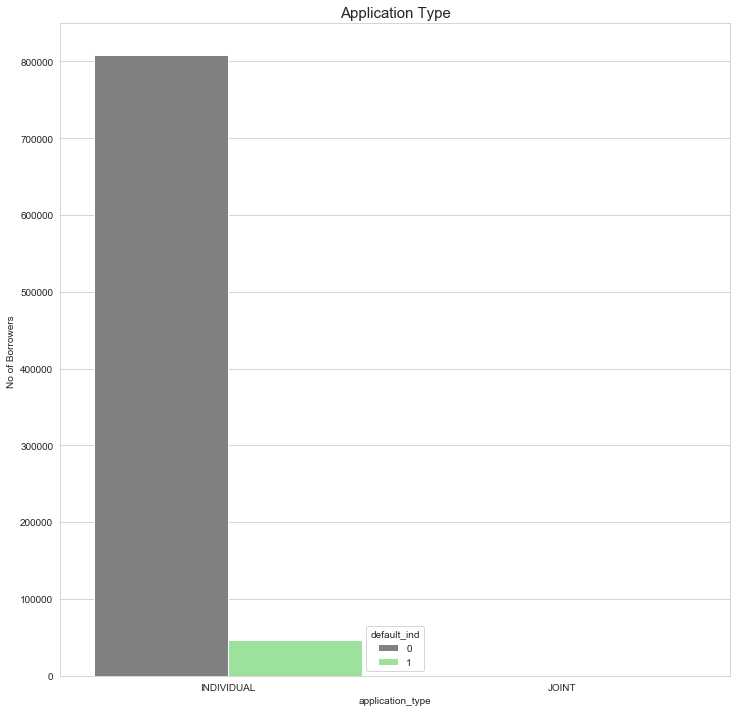

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,12))
sns.countplot(bank_lend['application_type'], hue=bank_lend['default_ind'], alpha =1, palette= ['grey','lightgreen'])
plt.title('Application Type',size=15)
plt.ylabel('No of Borrowers ')
plt.show()

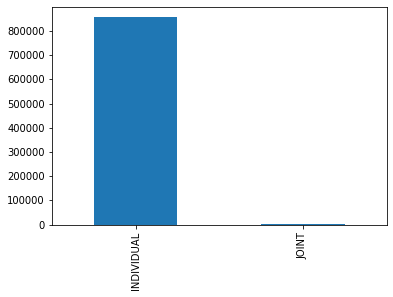

In [11]:
bank_lend.application_type.value_counts().plot.bar()

In [19]:
# No point of keeping this attribute in our model as the the variable is totally biased.

In [12]:
bank_lend=bank_lend.drop('application_type',axis=1)

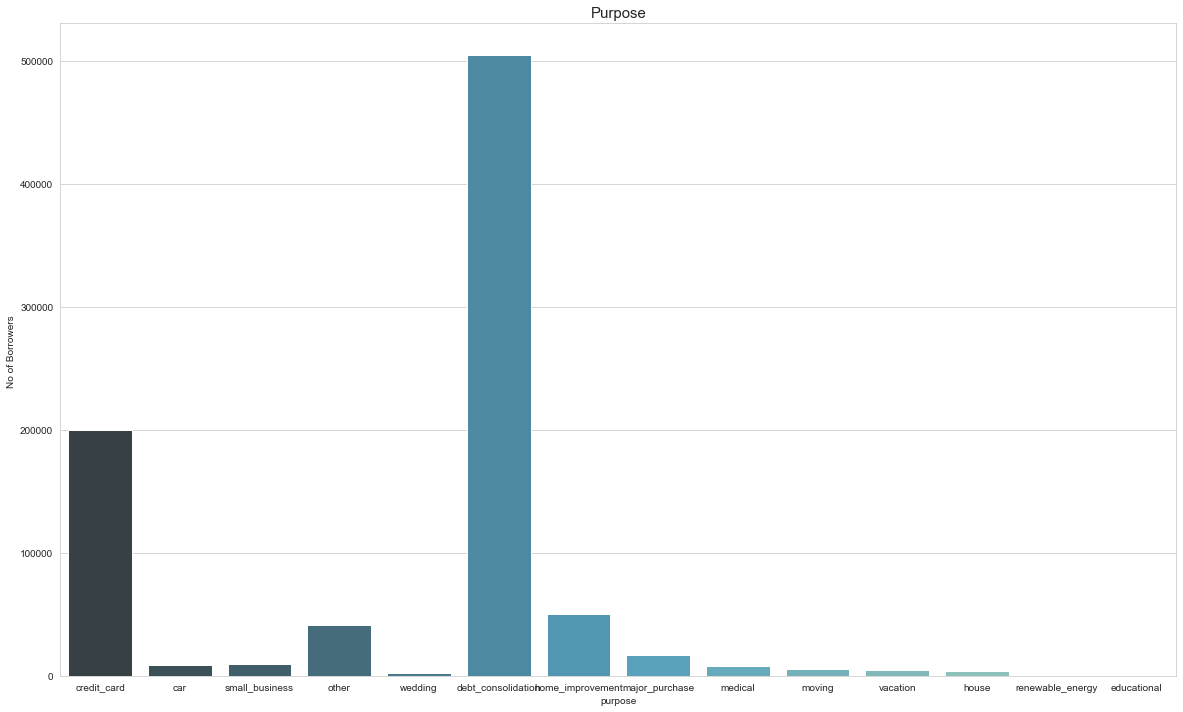

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,12))
sns.countplot(bank_lend['purpose'],alpha =1, palette='GnBu_d')
plt.title('Purpose',size=15)
plt.ylabel('No of Borrowers ')
plt.show()

In [ ]:
# There are total 13 categories. Over half of the loans  were for debt consolidation. Other significant categories were credit card and home improvement.



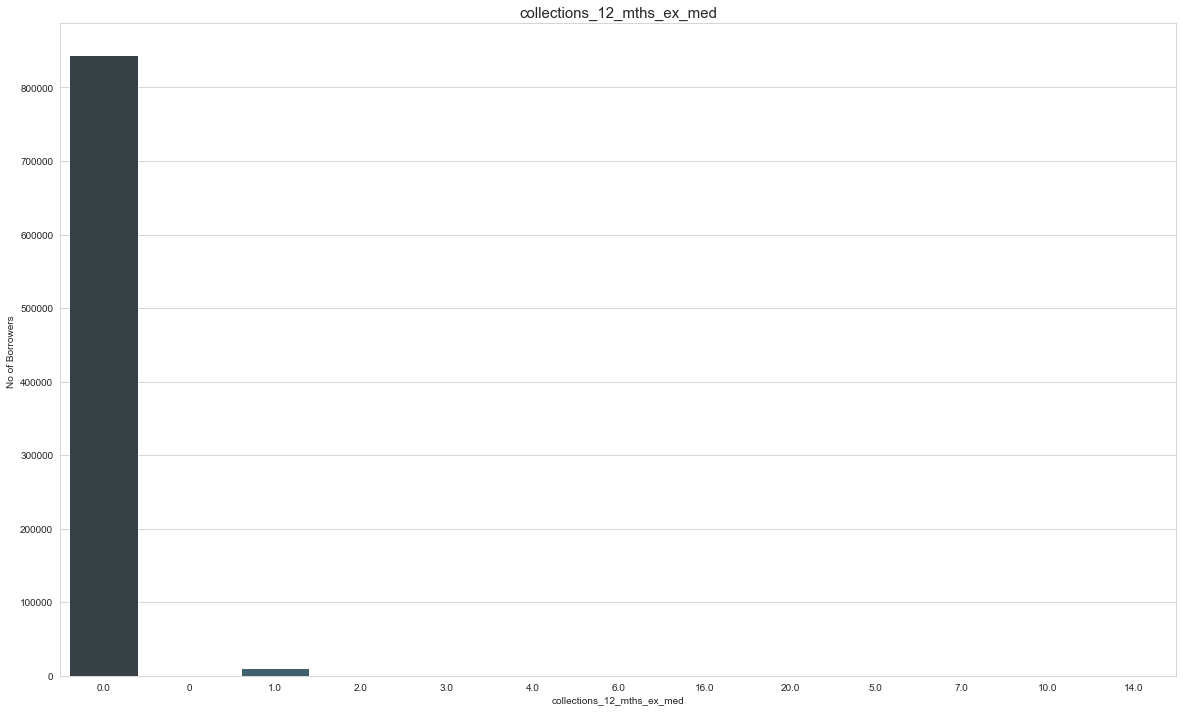

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,12))
sns.countplot(bank_lend['collections_12_mths_ex_med'],alpha =1, palette='GnBu_d')
plt.title('collections_12_mths_ex_med',size=15)
plt.ylabel('No of Borrowers ')
plt.show()


In [23]:
# Within a year  largly no collections are done .

#### NUMERICC VARIABLES

In [24]:
bank_lend.select_dtypes(include='number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,855969.0,14745.571335,8425.340005,500.00,8000.00,13000.000000,20000.000000,3.500000e+04
funded_amnt,855969.0,14732.378305,8419.471653,500.00,8000.00,13000.000000,20000.000000,3.500000e+04
funded_amnt_inv,855969.0,14700.061226,8425.805478,0.00,8000.00,13000.000000,20000.000000,3.500000e+04
int_rate,855969.0,13.192320,4.368365,5.32,9.99,12.990000,15.990000,2.899000e+01
installment,855969.0,436.238072,243.726876,15.69,260.55,382.550000,571.560000,1.445460e+03
annual_inc,855969.0,75071.185963,64264.469813,0.00,45000.00,65000.000000,90000.000000,9.500000e+06
dti,855969.0,18.122165,17.423629,0.00,11.88,17.610000,23.900000,9.999000e+03
delinq_2yrs,855969.0,0.311621,0.857189,0.00,0.00,0.000000,0.000000,3.900000e+01
inq_last_6mths,855969.0,0.680915,0.964033,0.00,0.00,0.000000,1.000000,8.000000e+00
mths_since_last_delinq,855969.0,34.149943,15.248191,0.00,32.00,34.149943,34.149943,1.880000e+02


In [25]:
bank_lend.select_dtypes(include='number').columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

Text(0.5, 1.0, 'dti')

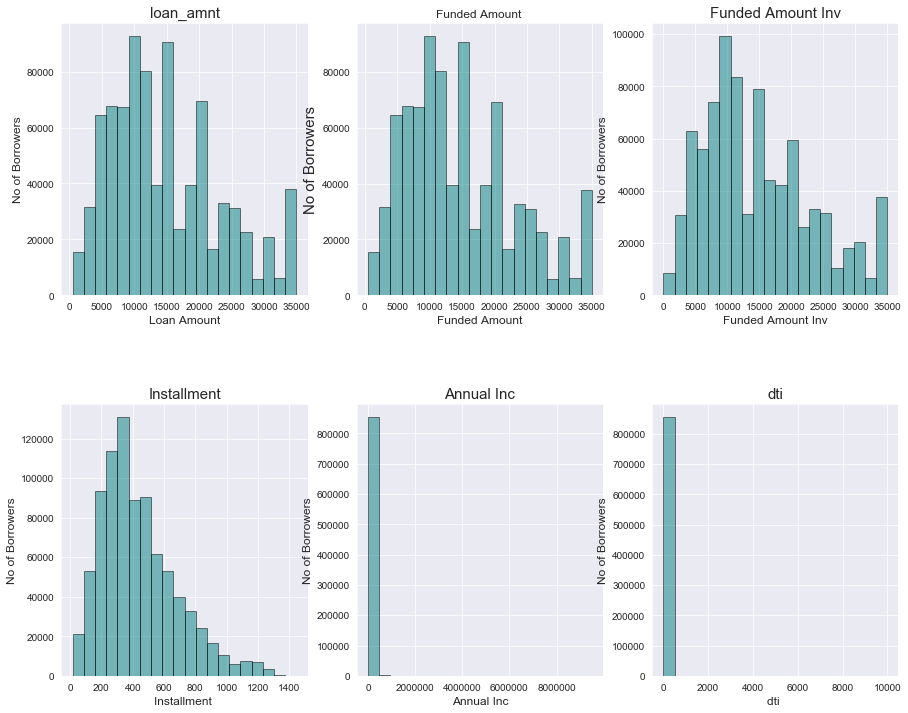

In [26]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,12))
fig.subplots_adjust(hspace = .40)

ax1 = fig.add_subplot(231)
ax1.hist(bank_lend['loan_amnt'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Loan Amount', fontsize = 12)
ax1.set_ylabel('No of Borrowers',fontsize = 12)
ax1.set_title('loan_amnt',fontsize = 15)

ax2 = fig.add_subplot(232)
ax2.hist(bank_lend['funded_amnt'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Funded Amount',fontsize = 12)
ax2.set_ylabel('No of Borrowers',fontsize = 15)
ax2.set_title('Funded Amount ',fontsize = 12)

ax3 = fig.add_subplot(233)
ax3.hist(bank_lend['funded_amnt_inv'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Funded Amount Inv',fontsize = 12)
ax3.set_ylabel('No of Borrowers',fontsize = 12)
ax3.set_title('Funded Amount Inv',fontsize = 15)

ax4= fig.add_subplot(234)
ax4.hist(bank_lend['installment'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Installment ',fontsize = 12)
ax4.set_ylabel('No of Borrowers',fontsize = 12)
ax4.set_title('Installment',fontsize = 15)

ax5= fig.add_subplot(235)
ax5.hist(bank_lend['annual_inc'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Annual Inc',fontsize = 12) 
ax5.set_ylabel('No of Borrowers',fontsize = 12)
ax5.set_title('Annual Inc',fontsize = 15)

ax6= fig.add_subplot(236)
ax6.hist(bank_lend['dti'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('dti ',fontsize = 12)
ax6.set_ylabel('No of Borrowers',fontsize = 12)
ax6.set_title('dti',fontsize = 15)



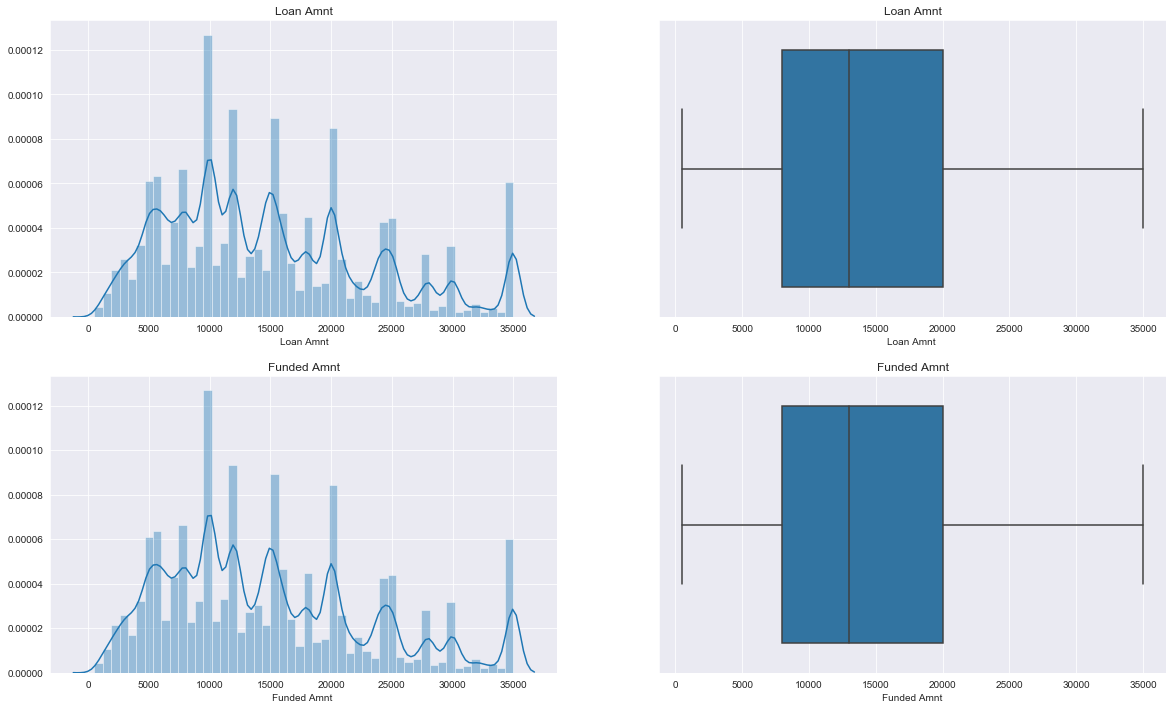

In [27]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(2,2, figsize = (20,12))

# Plot [0]
sns.distplot(bank_lend['loan_amnt'], ax = axes[0,0])
axes[0,0].set_xlabel('Loan Amnt')
axes[0,0].set_title('Loan Amnt')
# Plot [1]
sns.boxplot(bank_lend['loan_amnt'],ax = axes[0,1])
axes[0,1].set_xlabel('Loan Amnt ')
axes[0,1].set_title('Loan Amnt')

sns.distplot(bank_lend['funded_amnt'],ax = axes[1,0])
axes[1,0].set_xlabel('Funded Amnt ')
axes[1,0].set_title('Funded Amnt')

sns.boxplot(bank_lend['funded_amnt'], ax = axes[1,1])
axes[1,1].set_xlabel('Funded Amnt')
axes[1,1].set_title('Funded Amnt')


plt.show()

In [ ]:
# Anual income and dti are not normaly distributed. There is ahuge deviation in the claim incomes by the borrowers.

Text(0.5, 1.0, 'Revol Bal')

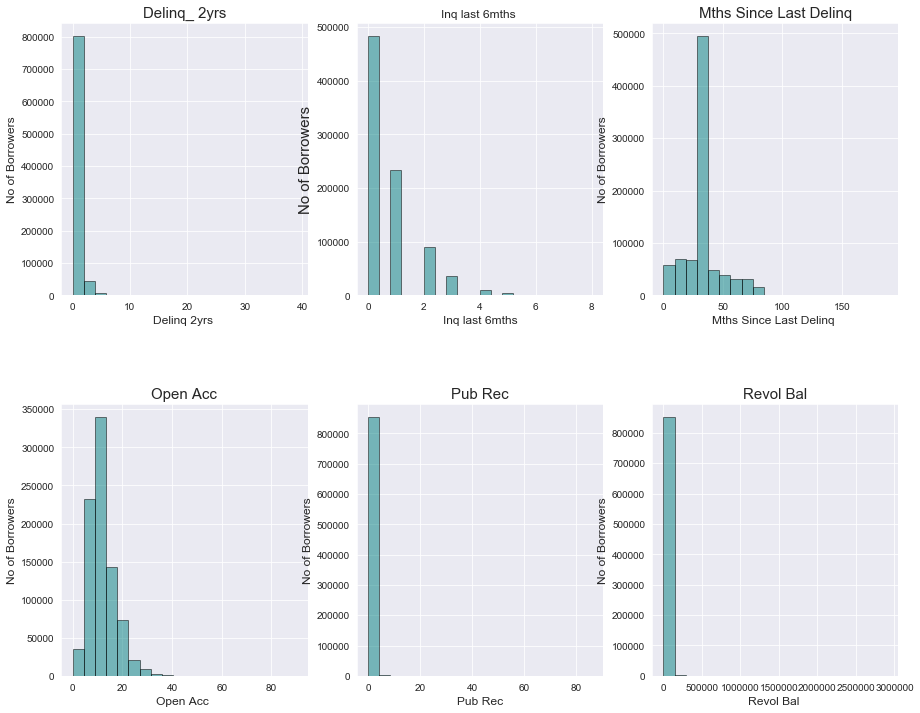

In [28]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,12))
fig.subplots_adjust(hspace = .40)

ax1 = fig.add_subplot(231)
ax1.hist(bank_lend['delinq_2yrs'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Delinq 2yrs ', fontsize = 12)
ax1.set_ylabel('No of Borrowers',fontsize = 12)
ax1.set_title('Delinq_ 2yrs',fontsize = 15)

ax2 = fig.add_subplot(232)
ax2.hist(bank_lend['inq_last_6mths'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Inq last 6mths',fontsize = 12)
ax2.set_ylabel('No of Borrowers',fontsize = 15)
ax2.set_title('Inq last 6mths ',fontsize = 12)

ax3 = fig.add_subplot(233)
ax3.hist(bank_lend['mths_since_last_delinq'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Mths Since Last Delinq ',fontsize = 12)
ax3.set_ylabel('No of Borrowers',fontsize = 12)
ax3.set_title('Mths Since Last Delinq',fontsize = 15)

ax4= fig.add_subplot(234)
ax4.hist(bank_lend['open_acc'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Open Acc ',fontsize = 12)
ax4.set_ylabel('No of Borrowers',fontsize = 12)
ax4.set_title('Open Acc',fontsize = 15)

ax5= fig.add_subplot(235)
ax5.hist(bank_lend['pub_rec'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Pub Rec',fontsize = 12) 
ax5.set_ylabel('No of Borrowers',fontsize = 12)
ax5.set_title('Pub Rec',fontsize = 15)

ax6= fig.add_subplot(236)
ax6.hist(bank_lend['revol_bal'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('Revol Bal ',fontsize = 12)
ax6.set_ylabel('No of Borrowers',fontsize = 12)
ax6.set_title('Revol Bal',fontsize = 15)



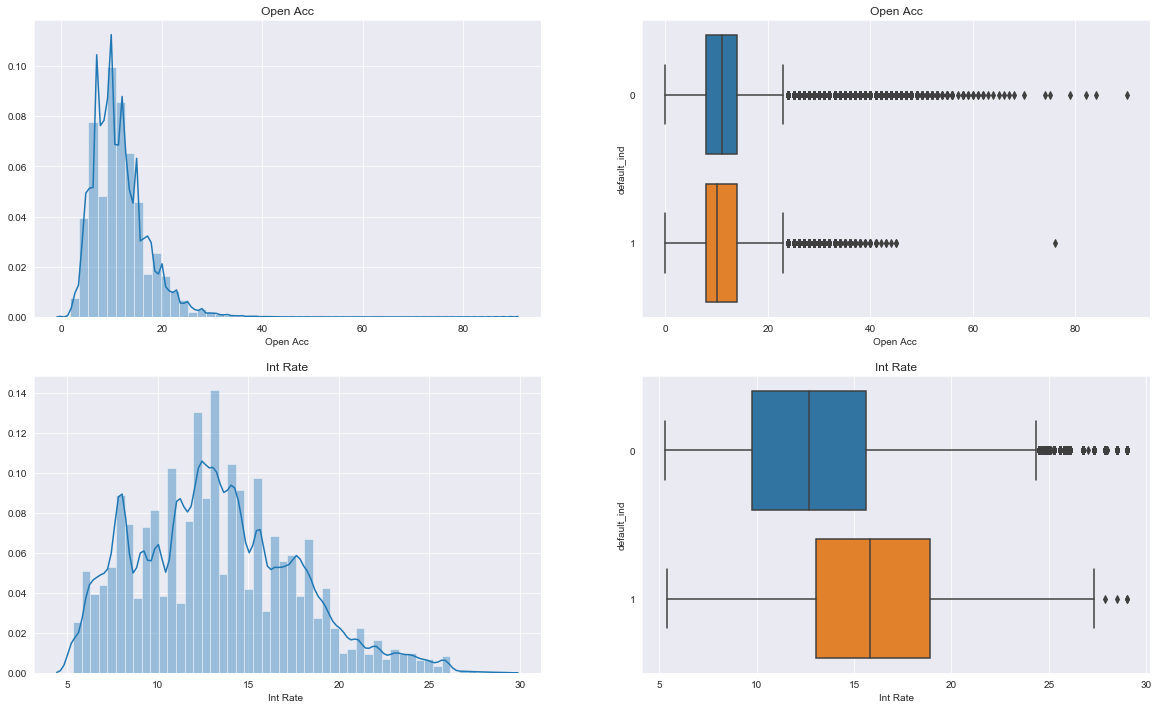

In [29]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(2,2, figsize = (20,12))

# Plot [0]
sns.distplot(bank_lend['open_acc'], ax = axes[0,0])
axes[0,0].set_xlabel('Open Acc')
axes[0,0].set_title('Open Acc')
# Plot [1]
sns.boxplot(x='open_acc',y='default_ind',data=bank_lend,orient='h',ax = axes[0,1])
axes[0,1].set_xlabel('Open Acc ')
axes[0,1].set_title('Open Acc')

sns.distplot(bank_lend['int_rate'],ax = axes[1,0])
axes[1,0].set_xlabel('Int Rate ')
axes[1,0].set_title('Int Rate')

sns.boxplot(x='int_rate',y='default_ind',data=bank_lend,orient='h', ax = axes[1,1])
axes[1,1].set_xlabel('Int Rate')
axes[1,1].set_title('Int Rate')


plt.show()


Text(0.5, 1.0, 'Total Pymnt Inv')

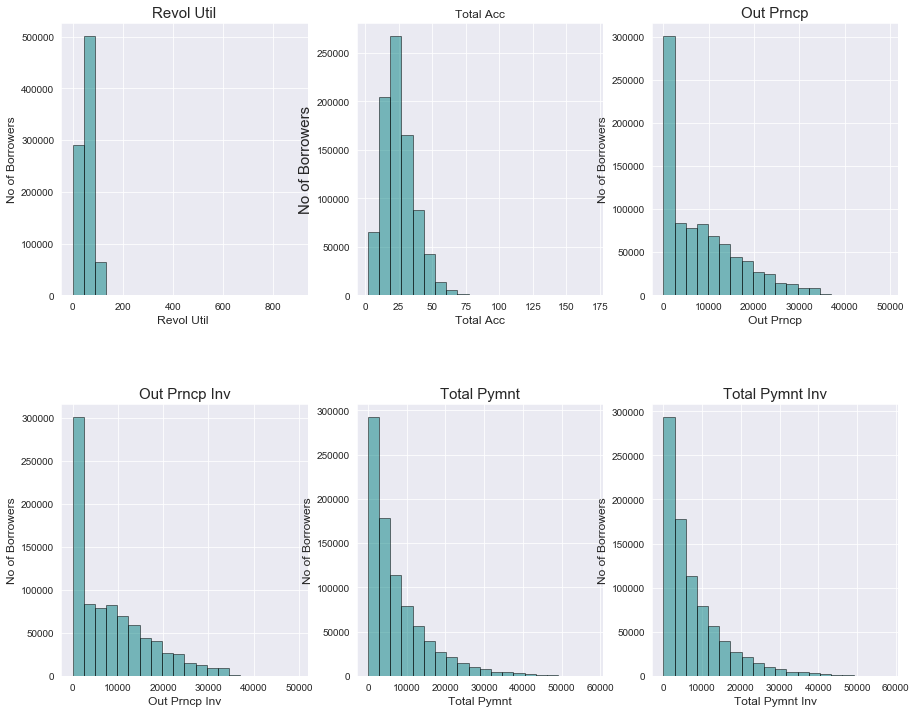

In [30]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,12))
fig.subplots_adjust(hspace = .40)

ax1 = fig.add_subplot(231)
ax1.hist(bank_lend['revol_util'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Revol Util ', fontsize = 12)
ax1.set_ylabel('No of Borrowers',fontsize = 12)
ax1.set_title('Revol Util',fontsize = 15)

ax2 = fig.add_subplot(232)
ax2.hist(bank_lend['total_acc'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Total Acc',fontsize = 12)
ax2.set_ylabel('No of Borrowers',fontsize = 15)
ax2.set_title('Total Acc',fontsize = 12)

ax3 = fig.add_subplot(233)
ax3.hist(bank_lend['out_prncp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Out Prncp',fontsize = 12)
ax3.set_ylabel('No of Borrowers',fontsize = 12)
ax3.set_title('Out Prncp',fontsize = 15)

ax4= fig.add_subplot(234)
ax4.hist(bank_lend['out_prncp_inv'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Out Prncp Inv',fontsize = 12)
ax4.set_ylabel('No of Borrowers',fontsize = 12)
ax4.set_title('Out Prncp Inv',fontsize = 15)

ax5= fig.add_subplot(235)
ax5.hist(bank_lend['total_pymnt'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Total Pymnt',fontsize = 12) 
ax5.set_ylabel('No of Borrowers',fontsize = 12)
ax5.set_title('Total Pymnt',fontsize = 15)

ax6= fig.add_subplot(236)
ax6.hist(bank_lend['total_pymnt_inv'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('Total Pymnt Inv',fontsize = 12)
ax6.set_ylabel('No of Borrowers',fontsize = 12)
ax6.set_title('Total Pymnt Inv',fontsize = 15)



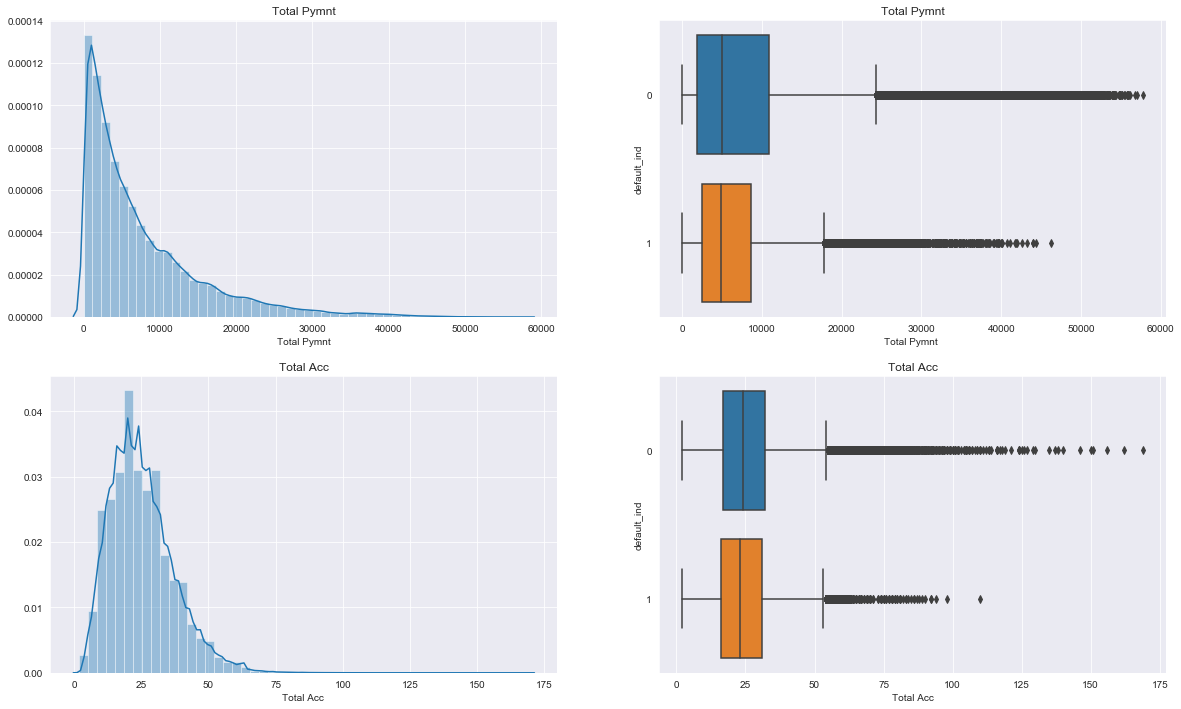

In [31]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(2,2, figsize = (20,12))

# Plot [0]
sns.distplot(bank_lend['total_pymnt'], ax = axes[0,0])
axes[0,0].set_xlabel('Total Pymnt')
axes[0,0].set_title('Total Pymnt')
# Plot [1]
sns.boxplot(x='total_pymnt',y='default_ind',data=bank_lend,orient='h',ax = axes[0,1])
axes[0,1].set_xlabel('Total Pymnt ')
axes[0,1].set_title('Total Pymnt')

sns.distplot(bank_lend['total_acc'],ax = axes[1,0])
axes[1,0].set_xlabel('Total Acc ')
axes[1,0].set_title('Total Acc')

sns.boxplot(x='total_acc',y='default_ind',data=bank_lend,orient='h', ax = axes[1,1])
axes[1,1].set_xlabel('Total Acc')
axes[1,1].set_title('Total Acc')


plt.show()


Text(0.5, 1.0, 'Acc Now Delinq ')

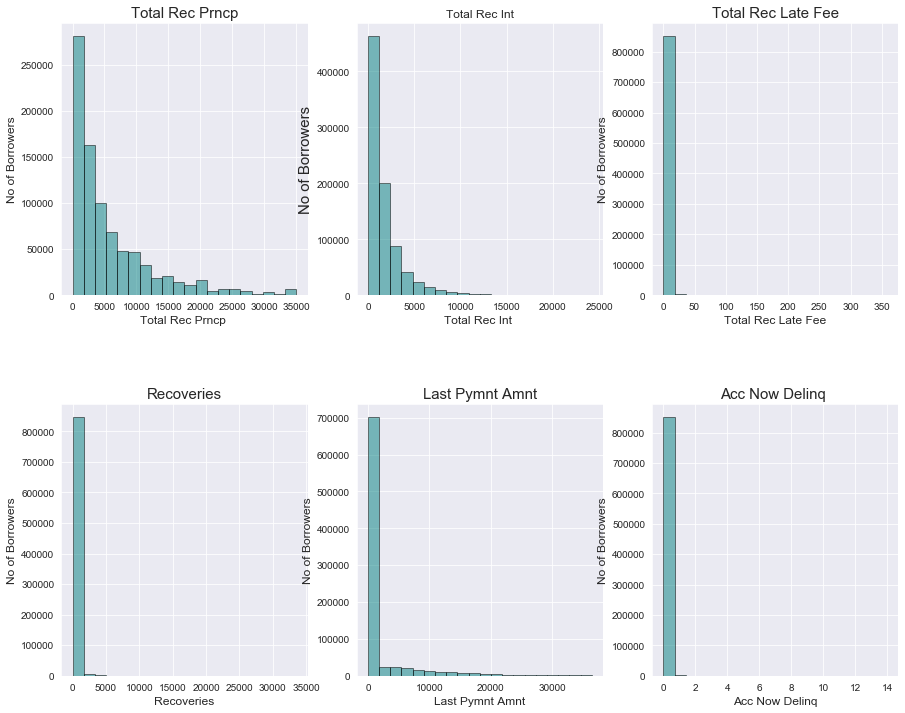

In [32]:

sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,12))
fig.subplots_adjust(hspace = .40)

ax1 = fig.add_subplot(231)
ax1.hist(bank_lend['total_rec_prncp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Total Rec Prncp ', fontsize = 12)
ax1.set_ylabel('No of Borrowers',fontsize = 12)
ax1.set_title('Total Rec Prncp',fontsize = 15)

ax2 = fig.add_subplot(232)
ax2.hist(bank_lend['total_rec_int'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Total Rec Int ',fontsize = 12)
ax2.set_ylabel('No of Borrowers',fontsize = 15)
ax2.set_title('Total Rec Int',fontsize = 12)

ax3 = fig.add_subplot(233)
ax3.hist(bank_lend['total_rec_late_fee'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Total Rec Late Fee',fontsize = 12)
ax3.set_ylabel('No of Borrowers',fontsize = 12)
ax3.set_title('Total Rec Late Fee',fontsize = 15)

ax4= fig.add_subplot(234)
ax4.hist(bank_lend['recoveries'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Recoveries',fontsize = 12)
ax4.set_ylabel('No of Borrowers',fontsize = 12)
ax4.set_title('Recoveries',fontsize = 15)

ax5= fig.add_subplot(235)
ax5.hist(bank_lend['last_pymnt_amnt'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Last Pymnt Amnt',fontsize = 12) 
ax5.set_ylabel('No of Borrowers',fontsize = 12)
ax5.set_title('Last Pymnt Amnt',fontsize = 15)

ax6= fig.add_subplot(236)
ax6.hist(bank_lend['acc_now_delinq'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('Acc Now Delinq',fontsize = 12)
ax6.set_ylabel('No of Borrowers',fontsize = 12)
ax6.set_title('Acc Now Delinq ',fontsize = 15)



Text(0.5, 1.0, 'Total Rev Hi Lim')

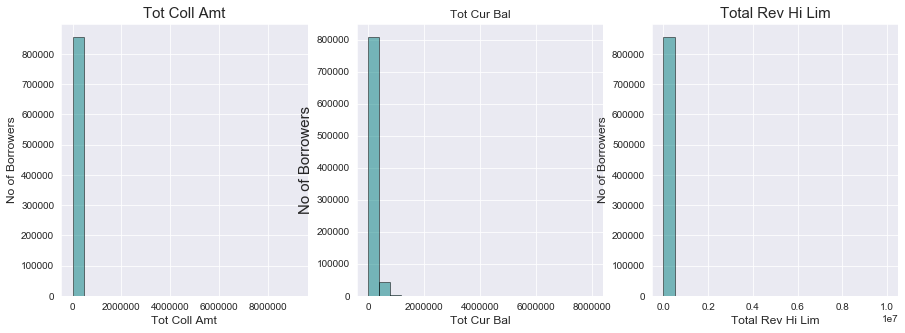

In [33]:

sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,12))
fig.subplots_adjust(hspace = .40)

ax1 = fig.add_subplot(231)
ax1.hist(bank_lend['tot_coll_amt'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Tot Coll Amt', fontsize = 12)
ax1.set_ylabel('No of Borrowers',fontsize = 12)
ax1.set_title('Tot Coll Amt',fontsize = 15)

ax2 = fig.add_subplot(232)
ax2.hist(bank_lend['tot_cur_bal'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Tot Cur Bal',fontsize = 12)
ax2.set_ylabel('No of Borrowers',fontsize = 15)
ax2.set_title('Tot Cur Bal',fontsize = 12)

ax3 = fig.add_subplot(233)
ax3.hist(bank_lend['total_rev_hi_lim'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Total Rev Hi Lim',fontsize = 12)
ax3.set_ylabel('No of Borrowers',fontsize = 12)
ax3.set_title('Total Rev Hi Lim',fontsize = 15)



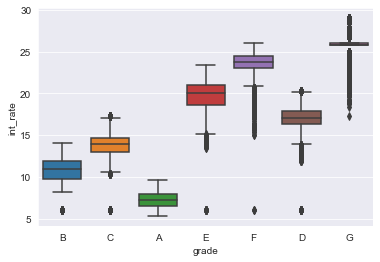

In [34]:
sns.boxplot('grade','int_rate',data=bank_lend)


#### CORRELATION

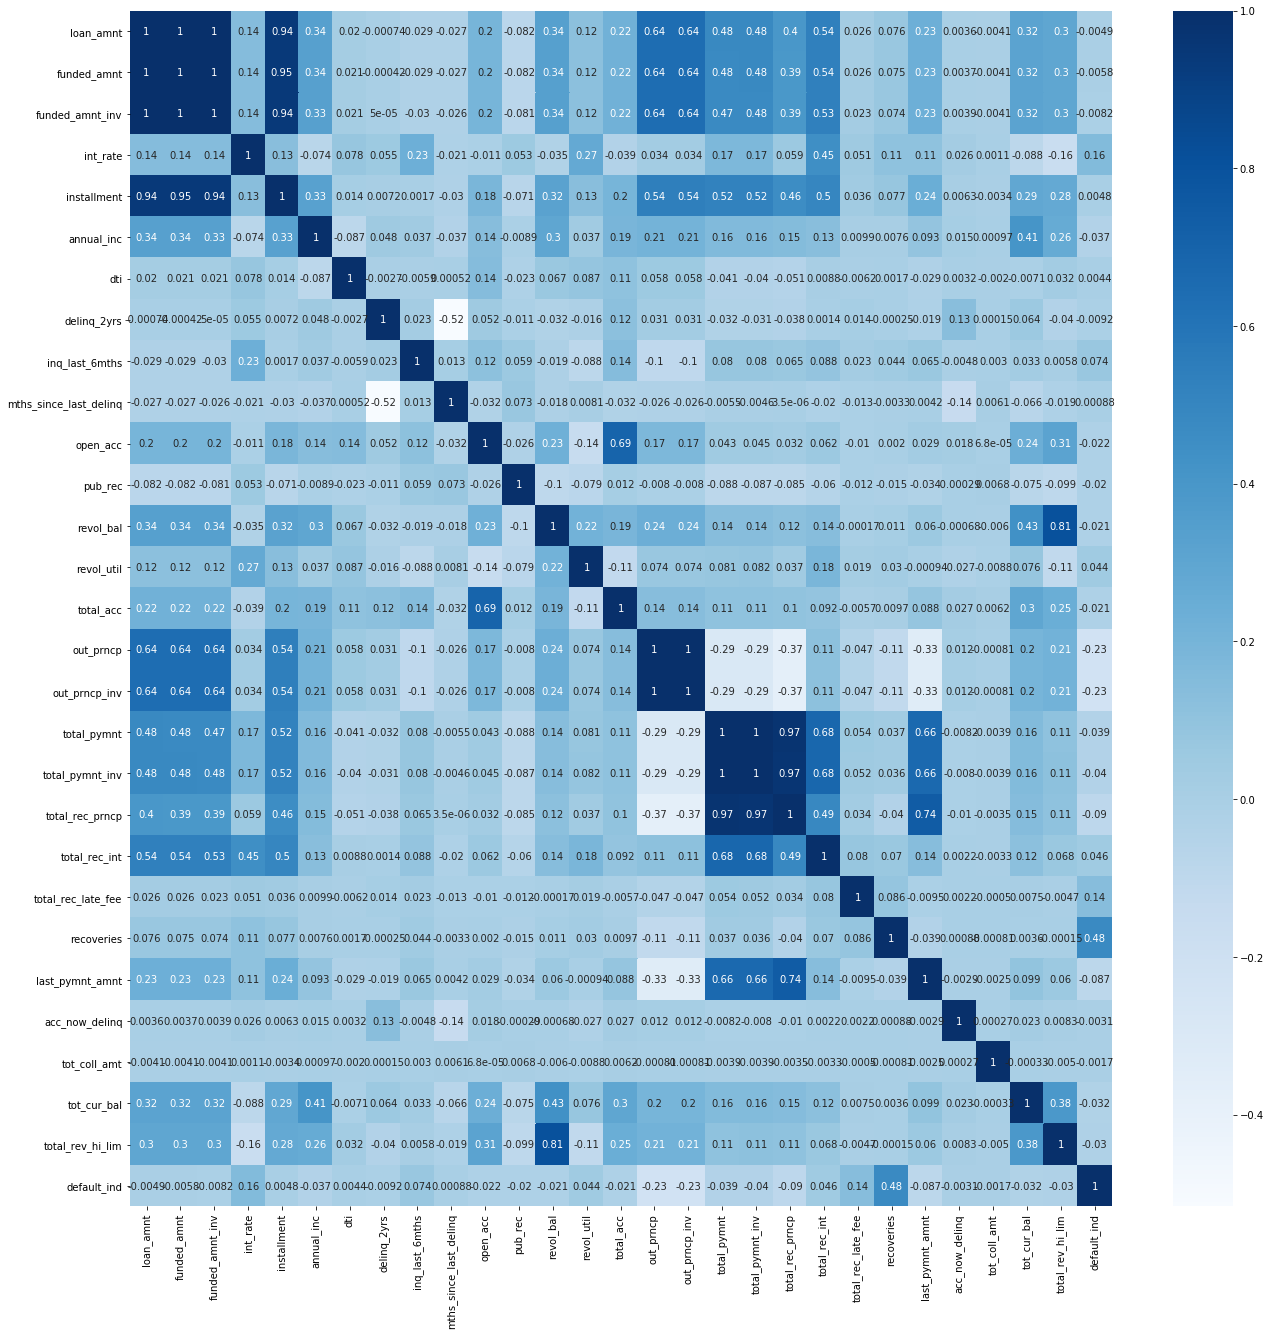

In [20]:
plt.figure(figsize=(22,22))
cor=(bank_lend[bank_lend.select_dtypes(include="number").columns]).corr()
top_numeric_features=cor.index
sns.heatmap(bank_lend[top_numeric_features].corr(),annot=True,cmap="Blues")

In [21]:
# Columns with high correlation
high_corr_columns=['loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment','annual_inc','total_pymnt','total_pymnt_inv','total_rec_prncp',
'revol_bal', 'total_rev_hi_lim','out_prncp','out_prncp_inv']        


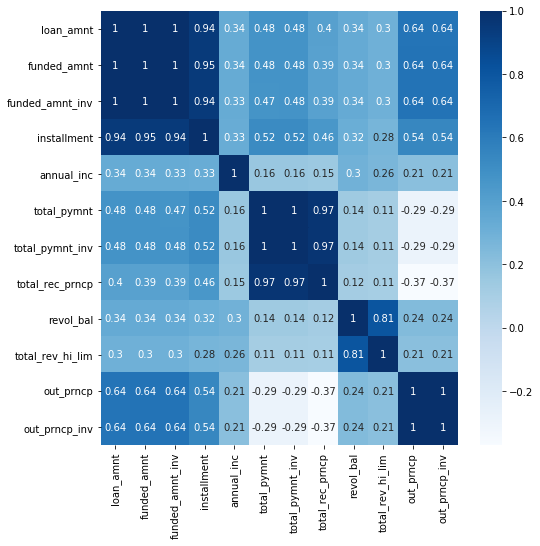

In [22]:
plt.figure(figsize=(8,8))
cor=(bank_lend[bank_lend[high_corr_columns].columns]).corr()
top_numeric_features=cor.index
sns.heatmap(bank_lend[top_numeric_features].corr(),annot=True,cmap="Blues")

In [ ]:
#'loan_amnt', 'funded_amnt', 'funded_amnt_inv' 'installment' these four features have a high correlation among them.
#'total_pymnt','total_pymnt_inv','total_rec_prncp' these three have high correlation among them.
#'revol_bal', 'total_rev_hi_lim' have high correlation among them.
#'out_prncp','out_prncp_inv' have high correlation among them.

In [23]:
cor=(bank_lend[bank_lend.select_dtypes(include="number").columns]).corr()

In [24]:
#coreelation with respect to traget

In [25]:
cor_list=(bank_lend[bank_lend.select_dtypes(include="number").columns]).corr()['default_ind'][:]

In [83]:
high_corr_columns=['loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment','annual_inc','total_pymnt','total_pymnt_inv','total_rec_prncp',
'revol_bal', 'total_rev_hi_lim']        


In [26]:
cor_list

loan_amnt                -0.004907
funded_amnt              -0.005797
funded_amnt_inv          -0.008209
int_rate                  0.155037
installment               0.004753
annual_inc               -0.037066
dti                       0.004429
delinq_2yrs              -0.009186
inq_last_6mths            0.074407
mths_since_last_delinq    0.000883
open_acc                 -0.021698
pub_rec                  -0.019607
revol_bal                -0.020696
revol_util                0.044475
total_acc                -0.021087
out_prncp                -0.225960
out_prncp_inv            -0.225959
total_pymnt              -0.039220
total_pymnt_inv          -0.040232
total_rec_prncp          -0.090336
total_rec_int             0.046050
total_rec_late_fee        0.140760
recoveries                0.475738
last_pymnt_amnt          -0.087217
acc_now_delinq           -0.003116
tot_coll_amt             -0.001708
tot_cur_bal              -0.032310
total_rev_hi_lim         -0.029896
default_ind         

In [42]:
least_cor=[]
for i in range(len(cor_list)):
    if cor_list[i]<0.02 and cor_list[i]>(-0.02):
        least_cor.append(cor_list.index[i])


In [43]:
least_cor

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'dti',
 'delinq_2yrs',
 'mths_since_last_delinq',
 'pub_rec',
 'acc_now_delinq',
 'tot_coll_amt']

#### TRANSFORMATION, CONVERSION OF VARIABLES IN NUMBER DTYPE

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
bank_lend.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,861.07,0.00,0.00,171.62,0,0.0,225.412882,139766.247529,32163.574526,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,435.17,0.00,117.08,119.66,0,0.0,225.412882,139766.247529,32163.574526,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,603.65,0.00,0.00,649.91,0,0.0,225.412882,139766.247529,32163.574526,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,2209.33,16.97,0.00,357.48,0,0.0,225.412882,139766.247529,32163.574526,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,1009.07,0.00,0.00,67.79,0,0.0,225.412882,139766.247529,32163.574526,0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,631.38,0.00,0.00,161.03,0,0.0,225.412882,139766.247529,32163.574526,0
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,...,3025.99,0.00,0.00,170.08,0,0.0,225.412882,139766.247529,32163.574526,0
7,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,9 years,RENT,...,938.14,0.00,0.00,111.34,0,0.0,225.412882,139766.247529,32163.574526,0
8,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,...,294.94,0.00,189.06,152.39,0,0.0,225.412882,139766.247529,32163.574526,1
9,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,...,533.42,0.00,269.29,121.45,0,0.0,225.412882,139766.247529,32163.574526,1


In [16]:
bank_lend.term.replace({' 36 months':0, ' 60 months':1},inplace=True)
bank_lend.verification_status.replace({'Verified':0, 'Source Verified':1, 'Not Verified':2},inplace=True)

In [17]:
bank_lend.grade.replace(to_replace='A',value=0,inplace=True)
bank_lend.grade.replace(to_replace='B',value=1,inplace=True)
bank_lend.grade.replace(to_replace='C',value=2,inplace=True)
bank_lend.grade.replace(to_replace='D',value=3,inplace=True)
bank_lend.grade.replace(to_replace='E',value=4,inplace=True)
bank_lend.grade.replace(to_replace='F',value=5,inplace=True)
bank_lend.grade.replace(to_replace='G',value=6,inplace=True)

In [18]:
bank_lend.sub_grade=le.fit_transform(bank_lend.sub_grade)
bank_lend.home_ownership=le.fit_transform(bank_lend.home_ownership)
bank_lend.addr_state=le.fit_transform(bank_lend.addr_state)

In [19]:
bank_lend.emp_length.replace(to_replace='< 1 year',value=0,inplace=True)
bank_lend.emp_length.replace(to_replace='1 year',value=1,inplace=True)
bank_lend.emp_length.replace(to_replace='2 years',value=2,inplace=True)
bank_lend.emp_length.replace(to_replace='3 years',value=3,inplace=True)
bank_lend.emp_length.replace(to_replace='4 years',value=4,inplace=True)
bank_lend.emp_length.replace(to_replace='5 years',value=5,inplace=True)
bank_lend.emp_length.replace(to_replace='6 years',value=6,inplace=True)
bank_lend.emp_length.replace(to_replace='7 years',value=7,inplace=True)
bank_lend.emp_length.replace(to_replace='8 years',value=8,inplace=True)
bank_lend.emp_length.replace(to_replace='9 years',value=9,inplace=True)
bank_lend.emp_length.replace(to_replace='10+ years',value=10,inplace=True)


In [20]:
bank_lend.initial_list_status.replace({'f':0, 'w':1},inplace=True)


In [21]:
bank_lend.purpose.replace(to_replace='credit_card',value=0,inplace=True)
bank_lend.purpose.replace(to_replace='car',value=1,inplace=True)
bank_lend.purpose.replace(to_replace='debt_consolidation',value=2,inplace=True)
bank_lend.purpose.replace(to_replace='educational',value=3,inplace=True)
bank_lend.purpose.replace(to_replace='home_improvement',value=4,inplace=True)
bank_lend.purpose.replace(to_replace='house',value=5,inplace=True)
bank_lend.purpose.replace(to_replace='debt_consolidation',value=6,inplace=True)
bank_lend.purpose.replace(to_replace='major_purchase',value=7,inplace=True)
bank_lend.purpose.replace(to_replace='medical',value=8,inplace=True)
bank_lend.purpose.replace(to_replace='moving',value=9,inplace=True)
bank_lend.purpose.replace(to_replace='renewable_energy',value=10,inplace=True)
bank_lend.purpose.replace(to_replace='small_business',value=11,inplace=True)
bank_lend.purpose.replace(to_replace='vacation',value=12,inplace=True)
bank_lend.purpose.replace(to_replace='wedding',value=13,inplace=True)
bank_lend.purpose.replace(to_replace='other',value=14,inplace=True)


In [22]:
bank_lend.collections_12_mths_ex_med=bank_lend.collections_12_mths_ex_med.astype('int')

### SAMPLING

In [23]:
bank_lend.shape

(855969, 40)

In [24]:
train = bank_lend[bank_lend['issue_d'] <= '2015-5-31']
test = bank_lend[bank_lend['issue_d'] >= '2015-6-01']


In [25]:
train=train.drop('issue_d',axis=1)
test=test.drop('issue_d',axis=1)

In [26]:
print(train.shape)
print(test.shape)

(598978, 39)
(256991, 39)


In [27]:
train_x=train.iloc[:,0:38]
train_y=train.iloc[:,38]
test_x=test.iloc[:,0:38]
test_y=test.iloc[:,38]

In [28]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(598978, 38)
(598978,)
(256991, 38)
(256991,)


In [29]:
test_y.head(1)

452272    0
Name: default_ind, dtype: int64

### MODEL BUILDING

### DECISION TREE

##### ON INITIAL DATA

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt=DecisionTreeClassifier(random_state=0)

In [96]:
# We are keeping all the initial fatures.

In [32]:
dt.fit(train_x,train_y)

DecisionTreeClassifier(random_state=0)

In [36]:
pred_dt=dt.predict(test_x)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [38]:
tab=confusion_matrix(test_y,pred_dt)
print(tab)

[[ 77403 179277]
 [     2    309]]


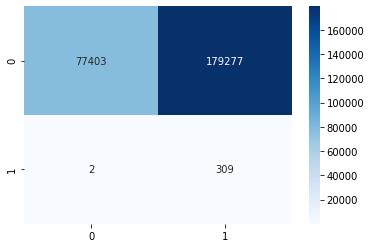

In [39]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [40]:
print(classification_report(test_y,pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.30    256991
   macro avg       0.50      0.65      0.23    256991
weighted avg       1.00      0.30      0.46    256991



In [41]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

30.15544647031323
99.35691318327974
99.99741618758479
0.17206241021015
30.239191255724908


In [42]:
pred_prob_dt=dt.predict_proba(test_x)

In [43]:
pred_prob_dt=pd.DataFrame(pred_prob_dt)

In [44]:
pred_prob_dt

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
256986,1.0,0.0
256987,1.0,0.0
256988,1.0,0.0
256989,1.0,0.0


In [45]:
roc_auc = roc_auc_score(test_y,pred_dt)
roc_auc


0.6475617982679649

In [46]:
fpr, tpr, threshold = roc_curve( test_y , pred_prob_dt.iloc[:,1] )



In [47]:
fpr, tpr, threshold

(array([0.        , 0.69844554, 1.        ]),
 array([0.        , 0.99356913, 1.        ]),
 array([2., 1., 0.]))

Text(0.2, 0.6, 'Area under curve is 0.6475617982679649')

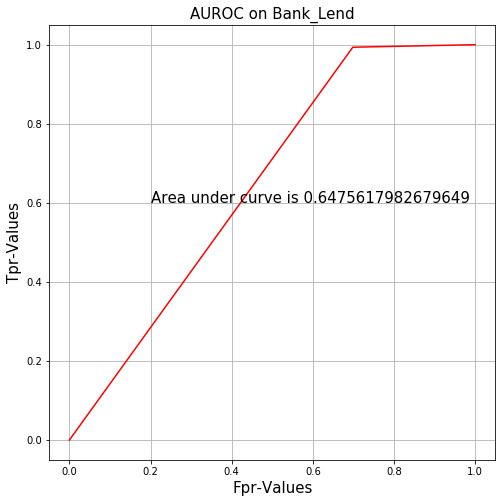

In [48]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


### FEATURE IMPORTANCE

In [75]:
dt.feature_importances_

array([8.60654345e-04, 1.91159587e-01, 5.09746829e-03, 5.39914791e-05,
       6.12570261e-04, 2.88981055e-03, 2.86170701e-04, 5.95365743e-04,
       3.13102361e-04, 8.81824728e-05, 1.31615162e-03, 1.25282094e-04,
       2.33479148e-04, 6.20436567e-04, 1.57696410e-03, 1.87940970e-04,
       2.96714265e-04, 8.05354946e-04, 7.16009952e-04, 1.41890030e-04,
       1.59261949e-03, 1.35127488e-03, 7.24811261e-04, 1.01538594e-04,
       2.87399692e-02, 1.18754213e-03, 1.92830831e-03, 2.52357407e-03,
       2.19980529e-01, 1.76557290e-03, 7.47655495e-04, 5.03976733e-01,
       2.38003366e-02, 3.31756436e-05, 2.57933881e-06, 5.37372712e-04,
       1.88490575e-03, 1.14437427e-03])

In [76]:
var_imp=pd.DataFrame({'Var':train_x.columns,"Imp":dt.feature_importances_})

In [77]:
var_imp.sort_values(by='Imp',ascending=False)

,Var,Imp
31,recoveries,0.503977
28,total_rec_prncp,0.219981
1,funded_amnt,0.191160
24,out_prncp,0.028740
32,last_pymnt_amnt,0.023800
2,funded_amnt_inv,0.005097
5,installment,0.002890
27,total_pymnt_inv,0.002524
26,total_pymnt,0.001928
36,tot_cur_bal,0.001885


In [78]:
from boruta import BorutaPy

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf=RandomForestClassifier()

In [88]:
train_x_boruta=np.array(train_x)
train_y_boruta=np.array(train_y)


In [108]:
boruta_feature_selector = BorutaPy(rf, max_iter= 15, verbose= 2,n_estimators=20)

In [109]:
boruta_feature_selector.fit(train_x_boruta , train_y_boruta)

Iteration: 	1 / 15
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	2 / 15
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	3 / 15
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	4 / 15
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	5 / 15
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	6 / 15
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	7 / 15
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	8 / 15
Confirmed: 	24
Tentative: 	2
Rejected: 	12
Iteration: 	9 / 15
Confirmed: 	24
Tentative: 	2
Rejected: 	12
Iteration: 	10 / 15
Confirmed: 	24
Tentative: 	2
Rejected: 	12
Iteration: 	11 / 15
Confirmed: 	24
Tentative: 	2
Rejected: 	12
Iteration: 	12 / 15
Confirmed: 	24
Tentative: 	2
Rejected: 	12
Iteration: 	13 / 15
Confirmed: 	24
Tentative: 	2
Rejected: 	12
Iteration: 	14 / 15
Confirmed: 	24
Tentative: 	2
Rejected: 	12


BorutaPy finished running.

Iteration: 	15 / 15
Confirmed: 	24
Tentative: 	0
Rejected: 	12


BorutaPy(estimator=RandomForestClassifier(n_estimators=20,
                                          random_state=RandomState(MT19937) at 0x127D37FBF8),
         max_iter=15, n_estimators=20,
         random_state=RandomState(MT19937) at 0x127D37FBF8, verbose=2)

In [110]:
boruta_feature_selector.support_


array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True])

In [111]:
boruta_featue_imp=pd.DataFrame({"variable":train_x.columns,"imp":boruta_feature_selector.support_})
boruta_featue_imp.sort_values("imp",ascending=False)

,variable,imp
0,loan_amnt,True
1,funded_amnt,True
36,tot_cur_bal,True
35,tot_coll_amt,True
32,last_pymnt_amnt,True
31,recoveries,True
30,total_rec_late_fee,True
29,total_rec_int,True
28,total_rec_prncp,True
27,total_pymnt_inv,True


In [98]:
boruta_feature_selector1 = BorutaPy(rf, max_iter= 25, verbose= 2,n_estimators=5)

In [99]:
boruta_feature_selector1.fit(train_x_boruta , train_y_boruta)

Iteration: 	1 / 25
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	2 / 25
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	3 / 25
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	4 / 25
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	5 / 25
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	6 / 25
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	7 / 25
Confirmed: 	0
Tentative: 	38
Rejected: 	0
Iteration: 	8 / 25
Confirmed: 	20
Tentative: 	6
Rejected: 	12
Iteration: 	9 / 25
Confirmed: 	20
Tentative: 	6
Rejected: 	12
Iteration: 	10 / 25
Confirmed: 	20
Tentative: 	6
Rejected: 	12
Iteration: 	11 / 25
Confirmed: 	20
Tentative: 	6
Rejected: 	12
Iteration: 	12 / 25
Confirmed: 	21
Tentative: 	5
Rejected: 	12
Iteration: 	13 / 25
Confirmed: 	21
Tentative: 	5
Rejected: 	12
Iteration: 	14 / 25
Confirmed: 	21
Tentative: 	5
Rejected: 	12
Iteration: 	15 / 25
Confirmed: 	21
Tentative: 	5
Rejected: 	12
Iteration: 	16 / 25
Confirmed: 	21
Tentative: 	5
Rejected: 	12
Iteratio

BorutaPy(estimator=RandomForestClassifier(n_estimators=5,
                                          random_state=RandomState(MT19937) at 0x127D37FBF8),
         max_iter=25, n_estimators=5,
         random_state=RandomState(MT19937) at 0x127D37FBF8, verbose=2)

In [100]:
boruta_feature_selector1.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True])

In [101]:
boruta_featue_imp1=pd.DataFrame({"variable":train_x.columns,"imp":boruta_feature_selector1.support_})
boruta_featue_imp1.sort_values("imp",ascending=False)

,variable,imp
0,loan_amnt,True
1,funded_amnt,True
36,tot_cur_bal,True
35,tot_coll_amt,True
32,last_pymnt_amnt,True
31,recoveries,True
30,total_rec_late_fee,True
29,total_rec_int,True
28,total_rec_prncp,True
27,total_pymnt_inv,True


In [112]:
from sklearn.feature_selection import RFE


In [115]:
rfe=RFE(rf,verbose=2)# 5= top 5 features

In [116]:
rfe.fit(train_x,train_y)

Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.


RFE(estimator=RandomForestClassifier(n_estimators=20,
                                     random_state=RandomState(MT19937) at 0x127D37FBF8),
    verbose=2)

In [120]:
rfe.

'auto'

In [118]:
rfe_imp=pd.DataFrame({'Var':train_x.columns,'IMP':rfe.support_})

In [119]:
rfe_imp.sort_values('IMP',ascending=False)

,Var,IMP
0,loan_amnt,True
14,dti,True
36,tot_cur_bal,True
35,tot_coll_amt,True
32,last_pymnt_amnt,True
31,recoveries,True
30,total_rec_late_fee,True
29,total_rec_int,True
28,total_rec_prncp,True
27,total_pymnt_inv,True


##### ON TOP FEATURES

In [49]:
top_train_x=train_x.iloc[:,[1,20,24,28,3,4,6,7,10,14,21,29,30,31,32,35,36]]
top_test_x=test_x.iloc[:,[1,20,24,28,3,4,6,7,10,14,21,29,30,31,32,35,36]]

In [50]:
dt.fit(top_train_x,train_y)

DecisionTreeClassifier(random_state=0)

In [51]:
pred1_dt=dt.predict(top_test_x)

In [52]:
tab=confusion_matrix(test_y,pred1_dt)
print(tab)

[[ 81563 175117]
 [     1    310]]


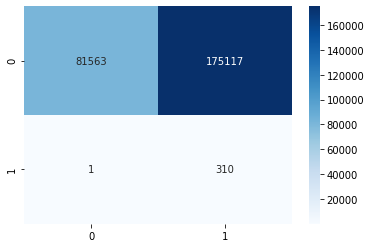

In [53]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [54]:
print(classification_report(test_y,pred1_dt))

              precision    recall  f1-score   support

           0       1.00      0.32      0.48    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.32    256991
   macro avg       0.50      0.66      0.24    256991
weighted avg       1.00      0.32      0.48    256991



In [55]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

31.776141499142902
99.67845659163987
99.99877396890786
0.17671168064209045
31.858314104384977


In [56]:
pred1_prob_dt=dt.predict_proba(top_test_x)

In [57]:
pred1_prob_dt=pd.DataFrame(pred1_prob_dt)

In [58]:
roc_auc = roc_auc_score(test_y,pred1_dt)
roc_auc


0.6572729904539139

In [59]:
fpr, tpr, threshold = roc_curve( test_y ,  pred1_prob_dt.iloc[:,1] )



In [60]:
fpr, tpr, threshold

(array([0.        , 0.68223859, 1.        ]),
 array([0.        , 0.99678457, 1.        ]),
 array([2., 1., 0.]))

Text(0.2, 0.6, 'Area under curve is 0.6572729904539139')

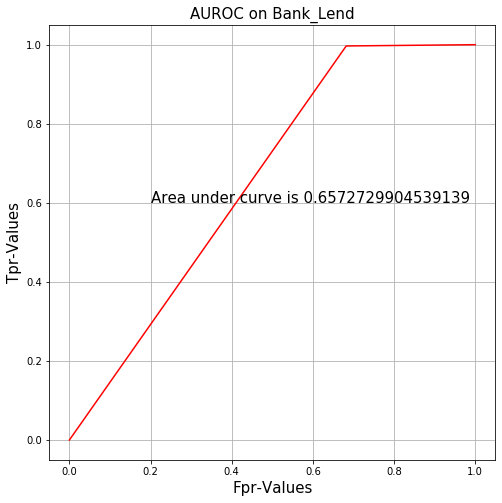

In [61]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


##### BEST HYPERPARAMETERS

In [62]:
from sklearn.model_selection import GridSearchCV


In [63]:
dt1=DecisionTreeClassifier(random_state=0)

In [64]:
search_dict = {"criterion" :["gini" , "entropy"],
               "max_depth" : range(3,10)}


In [65]:
grid = GridSearchCV(dt ,  param_grid =  search_dict)


In [66]:
grid.fit(top_train_x, train_y)   
#Note-We are building the model on tope features and balance dataset.

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10)})

In [67]:
grid.best_params_   


{'criterion': 'entropy', 'max_depth': 9}

In [68]:
pred_grid = grid.predict(top_test_x)
pred_grid

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
tab=confusion_matrix(test_y,pred_grid)
print(tab)

[[148559 108121]
 [    10    301]]


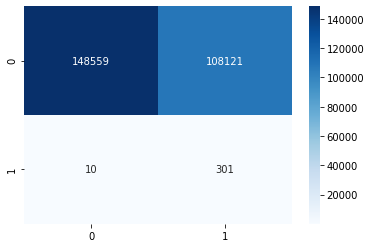

In [70]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [71]:
print(classification_report(test_y,pred_grid))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73    256680
           1       0.00      0.97      0.01       311

    accuracy                           0.58    256991
   macro avg       0.50      0.77      0.37    256991
weighted avg       1.00      0.58      0.73    256991



In [72]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

57.87712326632383
96.78456591639872
99.99326912074524
0.2776189334267953
57.92420746251814


In [73]:
pred_prob_grid_dt=grid.predict_proba(top_test_x)

In [74]:
pred_prob_grid_dt=pd.DataFrame(pred_prob_grid_dt)

In [75]:
roc_auc = roc_auc_score(test_y,pred_grid)
roc_auc


0.7733084459136127

In [76]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_prob_grid_dt.iloc[:,1] )



In [77]:
fpr, tpr, threshold

(array([0.        , 0.39472885, 0.39789232, 0.39789621, 0.42122877,
        0.4214859 , 0.49360293, 0.49376656, 0.50435562, 0.50669705,
        0.50670874, 0.50690354, 0.52251831, 0.52266246, 0.52476235,
        0.52477793, 0.52624279, 0.52624669, 0.52625838, 0.52640252,
        0.52644928, 0.52654667, 0.52655446, 0.52891538, 0.54955197,
        0.54963379, 0.61657706, 0.62882188, 0.6361189 , 0.63882655,
        0.63894343, 0.64912732, 0.64918965, 0.64925588, 0.65470625,
        0.65472962, 0.65489715, 0.67460651, 0.67493767, 0.69014727,
        0.69498208, 0.69527038, 0.70607371, 0.71778869, 0.73230092,
        0.7323165 , 0.73237105, 0.73238663, 0.73508259, 0.73612669,
        0.73615007, 0.73798114, 0.73807465, 0.73827723, 0.75376344,
        0.79523531, 0.79530544, 0.79558984, 0.79620929, 0.80508026,
        0.80511921, 0.81956522, 0.82409225, 1.        ]),
 array([0.        , 0.96141479, 0.96141479, 0.96141479, 0.96784566,
        0.96784566, 0.98392283, 0.98392283, 0.98392283, 0.

Text(0.2, 0.6, 'Area under curve is 0.7733084459136127')

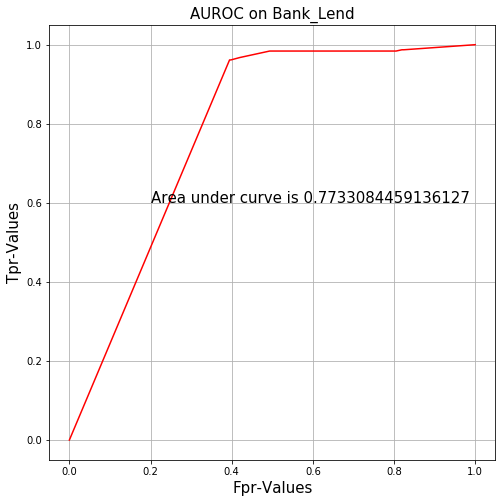

In [78]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


###### ON BALANCE DATSET

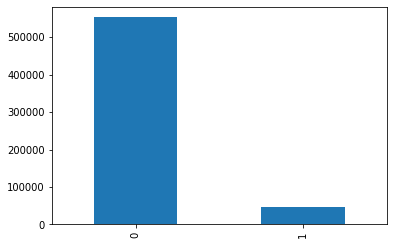

In [30]:
train_y.value_counts().plot.bar()

In [31]:
train_y.value_counts()

0    552822
1     46156
Name: default_ind, dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
strat={1:200000}

In [81]:
 smote=SMOTE(sampling_strategy=strat)

In [82]:
train_x_bl,train_y_bl=smote.fit_sample(top_train_x,train_y)

In [83]:
dt_bl=DecisionTreeClassifier(random_state=0,criterion= 'entropy', max_depth= 9)

In [84]:
dt_bl.fit(train_x_bl,train_y_bl)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

In [85]:
pred_dt_bl=dt_bl.predict(top_test_x)

In [86]:
tab=confusion_matrix(test_y,pred_dt_bl)
print(tab)

[[178727  77953]
 [    26    285]]


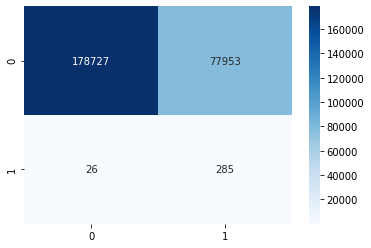

In [87]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [88]:
print(classification_report(test_y,pred_dt_bl))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82    256680
           1       0.00      0.92      0.01       311

    accuracy                           0.70    256991
   macro avg       0.50      0.81      0.41    256991
weighted avg       1.00      0.70      0.82    256991



In [89]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

69.63027894654823
91.63987138263666
99.98545478956996
0.3642731153659347
69.65691405535603


In [90]:
pred_prob_dt_bl=dt_bl.predict_proba(top_test_x)

In [91]:
pred_prob_dt_bl=pd.DataFrame(pred_prob_dt_bl)

In [92]:
roc_auc = roc_auc_score(test_y,pred_dt_bl)
roc_auc


0.8063507516459243

In [93]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_prob_dt_bl.iloc[:,1] )



In [94]:
fpr, tpr, threshold

(array([0.        , 0.10716456, 0.23675783, 0.24864812, 0.24866371,
        0.27440003, 0.30369721, 0.3037089 , 0.3038063 , 0.30396213,
        0.30404395, 0.30441016, 0.30733598, 0.32411563, 0.32411953,
        0.34433926, 0.34450288, 0.34469378, 0.34472495, 0.34473664,
        0.34475612, 0.34477949, 0.3448691 , 0.36754324, 0.3675822 ,
        0.37230014, 0.37233131, 0.4742403 , 0.47435328, 0.5191094 ,
        0.51913277, 0.51914056, 0.51926913, 0.51931588, 0.51932757,
        0.61075269, 0.61176173, 0.61900421, 0.61920679, 0.63425666,
        0.64580411, 0.7462911 , 0.74630279, 0.74689886, 0.75111033,
        0.75144928, 0.75163628, 0.75195964, 0.75224794, 0.79457301,
        0.79512623, 0.7952431 , 0.7959171 , 0.79683653, 0.79695341,
        0.79742091, 0.80450366, 0.80466339, 0.81778479, 0.81785881,
        0.81788219, 0.81792894, 0.817964  , 0.91221365, 0.91450055,
        0.93192302, 0.93202431, 0.93562412, 0.95557893, 1.        ]),
 array([0.        , 0.80707395, 0.90353698, 0.

Text(0.2, 0.6, 'Area under curve is 0.8063507516459243')

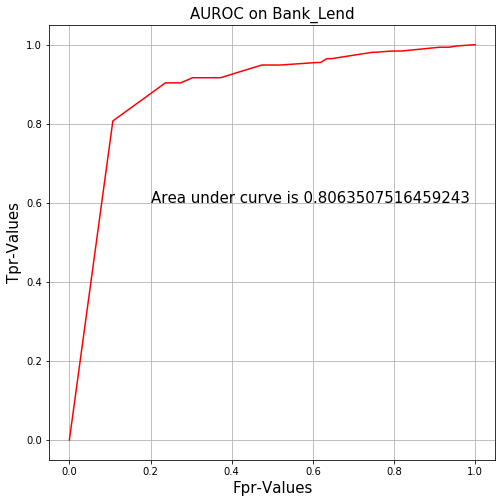

In [95]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


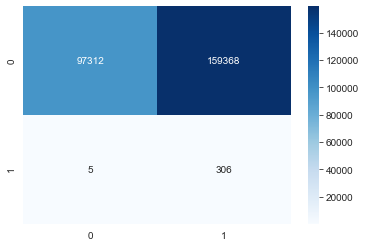

In [162]:
sns.heatmap(confusion_matrix(test_y,dt_bl_pred),annot=True,fmt='d',cmap="Blues")

### RAMDOM FOREST

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf=RandomForestClassifier(random_state=0)

##### ON INITIAL DATA

In [98]:
rf.fit(train_x,train_y)

RandomForestClassifier(random_state=0)

In [99]:
pred_rf=rf.predict(test_x)

In [100]:
tab=confusion_matrix(test_y,pred_rf)
print(tab)

[[ 99908 156772]
 [     1    310]]


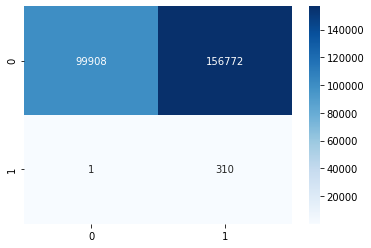

In [101]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [102]:
print(classification_report(test_y,pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.39      0.56    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.39    256991
   macro avg       0.50      0.69      0.28    256991
weighted avg       1.00      0.39      0.56    256991



In [103]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

38.923172822191056
99.67845659163987
99.99899908917115
0.19734915521829366
38.99669638236358


In [104]:
pred_prob_rf=rf.predict_proba(test_x)

In [105]:
pred_prob_rf=pd.DataFrame(pred_prob_rf)

In [106]:
roc_auc = roc_auc_score(test_y,pred_rf)
roc_auc


0.6930081470691547

In [107]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_prob_rf.iloc[:,1])



In [108]:
fpr, tpr, threshold

(array([0.        , 0.00619448, 0.02006389, 0.03786427, 0.05771388,
        0.07858423, 0.10048699, 0.12321568, 0.14640408, 0.16911329,
        0.1899252 , 0.20951379, 0.22746611, 0.24442496, 0.2602696 ,
        0.27526492, 0.28971872, 0.3033271 , 0.31673679, 0.32926212,
        0.34122253, 0.35316737, 0.36450055, 0.37593891, 0.38685133,
        0.39806763, 0.4090307 , 0.42021973, 0.43126071, 0.44223936,
        0.45314399, 0.46347203, 0.47421303, 0.48499688, 0.49527427,
        0.50543478, 0.51519402, 0.52438055, 0.53324373, 0.54157317,
        0.54951301, 0.55733988, 0.56430965, 0.57103787, 0.57738819,
        0.58319308, 0.58902914, 0.59469378, 0.60002338, 0.60533739,
        0.61076827, 0.61587969, 0.62085086, 0.62608696, 0.63156849,
        0.63712794, 0.64299127, 0.64872604, 0.65448418, 0.66033193,
        0.66596151, 0.67155992, 0.67705314, 0.68232429, 0.68773181,
        0.69323282, 0.69859358, 0.70372448, 0.7092177 , 0.71458626,
        0.71954574, 0.72478962, 0.7294647 , 0.73

Text(0.2, 0.6, 'Area under curve is 0.6930081470691547')

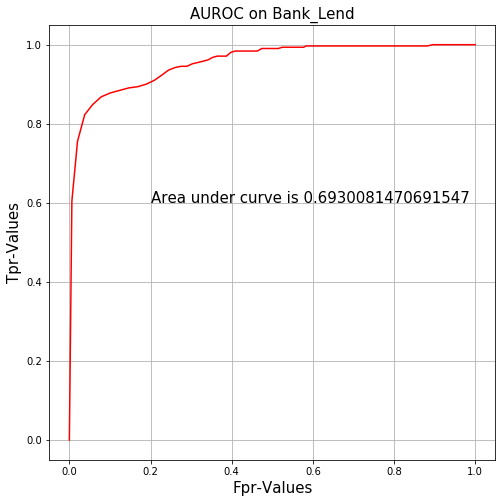

In [109]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


##### ON TOP FEATURES

In [110]:
rf.fit(top_train_x,train_y)

RandomForestClassifier(random_state=0)

In [111]:
pred1_rf=rf.predict(top_test_x)

In [112]:
tab=confusion_matrix(test_y,pred1_rf)
print(tab)

[[124468 132212]
 [     2    309]]


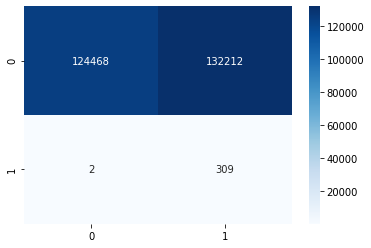

In [113]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [114]:
print(classification_report(test_y,pred1_rf))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.49    256991
   macro avg       0.50      0.74      0.33    256991
weighted avg       1.00      0.49      0.65    256991



In [115]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

48.491506934704695
99.35691318327974
99.99839318711336
0.23317059183072872
48.553062169492314


In [116]:
pred1_prob_rf=rf.predict_proba(top_test_x)

In [117]:
pred1_prob_rf=pd.DataFrame(pred1_prob_rf)

In [118]:
roc_auc = roc_auc_score(test_y,pred1_rf)
roc_auc


0.7392421005899221

In [119]:
fpr, tpr, threshold = roc_curve( test_y ,  pred1_prob_rf.iloc[:,1])



In [120]:
fpr, tpr, threshold

(array([0.        , 0.00108696, 0.0039933 , 0.00851644, 0.0143525 ,
        0.02153265, 0.02964781, 0.03794998, 0.04744039, 0.05822035,
        0.07096385, 0.08486053, 0.10005454, 0.11618747, 0.13272557,
        0.14849618, 0.1643564 , 0.17961275, 0.19340424, 0.20651005,
        0.21902369, 0.23092177, 0.2421147 , 0.25284011, 0.26355774,
        0.273952  , 0.28429952, 0.29400031, 0.30413355, 0.3144499 ,
        0.32468054, 0.33472417, 0.34488079, 0.35509974, 0.36506545,
        0.37477014, 0.38473586, 0.39400031, 0.40308555, 0.41239286,
        0.42165342, 0.43066854, 0.43992909, 0.44892473, 0.45829437,
        0.46776141, 0.47724794, 0.48664095, 0.49610799, 0.5056101 ,
        0.51508493, 0.5249961 , 0.53451379, 0.54356007, 0.55247779,
        0.5603631 , 0.56765233, 0.57491039, 0.58172433, 0.58833177,
        0.59520025, 0.6018077 , 0.6085554 , 0.61533037, 0.62201964,
        0.62831541, 0.63473586, 0.64120695, 0.6472456 , 0.65310893,
        0.65907745, 0.6649213 , 0.67057036, 0.67

Text(0.2, 0.6, 'Area under curve is 0.7392421005899221')

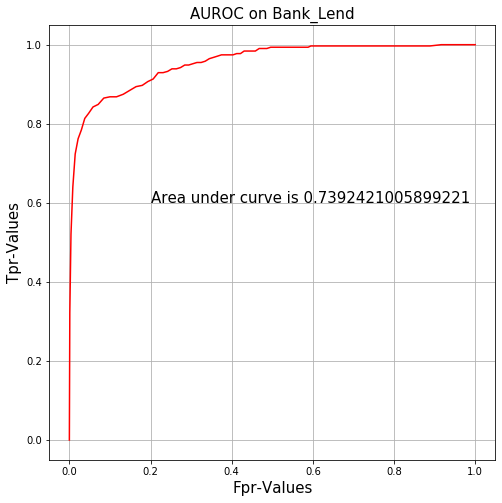

In [121]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


##### GRIDE SEARCH

In [122]:
rf=RandomForestClassifier(n_estimators=20,random_state=0)

In [123]:
search_dict = {"criterion" :["gini" , "entropy"],
               "max_depth" : range(3,10)}


In [124]:
grid = GridSearchCV(rf ,  param_grid =  search_dict)


In [125]:
grid.fit(top_train_x, train_y)   
#Note-We are building the model on tope features and balance dataset.

GridSearchCV(estimator=RandomForestClassifier(n_estimators=20, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10)})

In [126]:
grid.best_params_   


{'criterion': 'gini', 'max_depth': 9}

In [127]:
pred_grid_rf = grid.predict(top_test_x)
pred_grid

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [42]:
tab=confusion_matrix(test_y,pred_grid_rf)
print(tab)

[[170973  85707]
 [     7    304]]


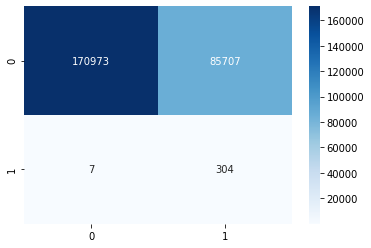

In [43]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [44]:
print(classification_report(test_y,pred_grid_rf))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80    256680
           1       0.00      0.98      0.01       311

    accuracy                           0.67    256991
   macro avg       0.50      0.82      0.40    256991
weighted avg       1.00      0.67      0.80    256991



In [45]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

66.60939691444601
97.7491961414791
99.99590595391274
0.35344316424643357
66.6470810261838


In [46]:
pred_prob_grid_rf=grid.predict_proba(top_test_x)

In [47]:
pred_prob_grid_rf=pd.DataFrame(pred_prob_grid_rf)

In [50]:
roc_auc = roc_auc_score(test_y,pred_grid_rf)
roc_auc


0.8217929652796255

In [51]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_grid_rf )



In [52]:
fpr, tpr, threshold

(array([0.        , 0.33390603, 1.        ]),
 array([0.        , 0.97749196, 1.        ]),
 array([2, 1, 0], dtype=int64))

Text(0.2, 0.6, 'Area under curve is 0.8217929652796255')

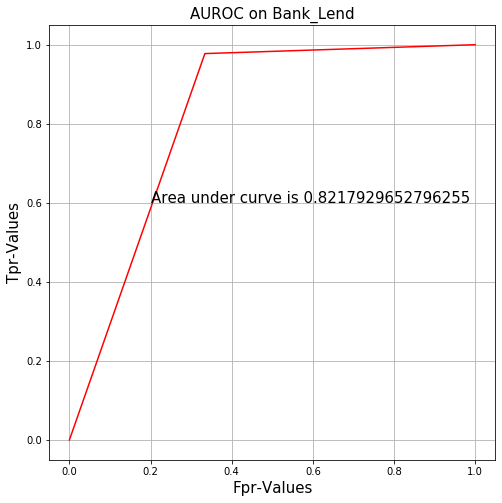

In [53]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


##### ON BALANCED DATA SET

In [54]:
rf=RandomForestClassifier(random_state=0,max_depth=9)

In [55]:
rf.fit(train_x_bl,train_y_bl)

RandomForestClassifier(max_depth=9, random_state=0)

In [57]:
pred4_bl=rf.predict(top_test_x)

In [58]:
tab=confusion_matrix(test_y,pred4_bl)
print(tab)

[[240285  16395]
 [    55    256]]


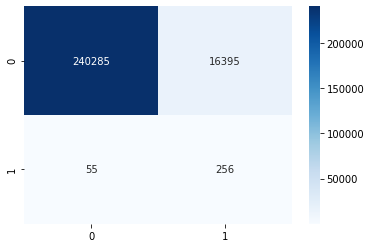

In [59]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [60]:
print(classification_report(test_y,pred4_bl))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    256680
           1       0.02      0.82      0.03       311

    accuracy                           0.94    256991
   macro avg       0.51      0.88      0.50    256991
weighted avg       1.00      0.94      0.97    256991



In [61]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

93.61266947171576
82.31511254019293
99.9771157526837
1.5374451984865773
93.5989976302672


In [62]:
pred4_prob_rf_bl=rf.predict_proba(top_test_x)

In [63]:
pred4_prob_rf_bl=pd.DataFrame(pred4_prob_rf_bl)

In [64]:
roc_auc = roc_auc_score(test_y,pred4_bl)
roc_auc


0.8796389100595434

In [65]:
fpr, tpr, threshold = roc_curve( test_y ,  pred4_bl )



In [66]:
fpr, tpr, threshold

(array([0.        , 0.06387331, 1.        ]),
 array([0.        , 0.82315113, 1.        ]),
 array([2, 1, 0], dtype=int64))

Text(0.2, 0.6, 'Area under curve is 0.8796389100595434')

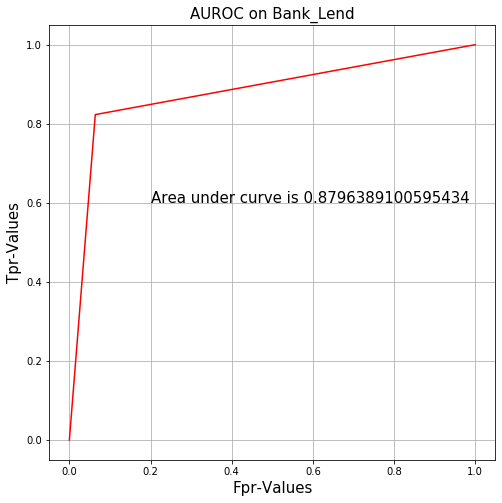

In [67]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


### CROSS VALIDATION

In [128]:
from sklearn.model_selection import cross_val_score


In [129]:
score_rf=cross_val_score(rf,top_train_x,train_y,scoring="accuracy",cv=10)

In [130]:
print(score_rf.mean())
print(score_rf.min())
print(score_rf.max())

0.9963137172918822
0.9922534976126081
0.998280410030385


In [131]:
score_rf

array([0.99772947, 0.99759591, 0.99828041, 0.9979632 , 0.99587632,
       0.99694481, 0.99611005, 0.9922535 , 0.99681119, 0.9935723 ])

In [132]:
score_rf_bl=cross_val_score(rf,train_x_bl,train_y_bl,scoring="accuracy",cv=10)

In [133]:
print(score_rf_bl.mean())
print(score_rf_bl.min())
print(score_rf_bl.max())

0.9948606818056733
0.9880716762084402
0.9972237719507984


In [134]:
score_rf_bl

array([0.99345138, 0.98807168, 0.9930395 , 0.9967987 , 0.99690497,
       0.99675885, 0.99698467, 0.9921628 , 0.99721049, 0.99722377])

In [135]:
score_dt=cross_val_score(dt,train_x_bl,train_y_bl,scoring="accuracy",cv=10)

In [137]:
print(score_dt.mean())
print(score_dt.min())
print(score_dt.max())

0.9753780041700081
0.9384987314533162
0.9937036741850641


In [138]:
score_dt

array([0.992402  , 0.93849873, 0.97804256, 0.99370367, 0.97154698,
       0.99050238, 0.96989984, 0.95318934, 0.98601259, 0.97998193])

### ADA BOOST

In [140]:
from sklearn.ensemble import AdaBoostClassifier


In [141]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [142]:
abc=AdaBoostClassifier()

In [143]:
abc.fit(train_x_bl,train_y_bl)

AdaBoostClassifier()

In [144]:
pred_abc=abc.predict(top_test_x)

In [145]:
tab=confusion_matrix(test_y,pred_abc)
print(tab)

[[222298  34382]
 [    38    273]]


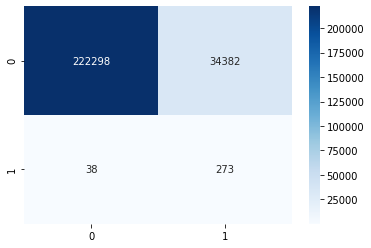

In [146]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [147]:
print(classification_report(test_y,pred_abc))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    256680
           1       0.01      0.88      0.02       311

    accuracy                           0.87    256991
   macro avg       0.50      0.87      0.47    256991
weighted avg       1.00      0.87      0.93    256991



In [148]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

86.60511142278324
87.78135048231512
99.98290875071963
0.78776511325927
86.60653485919741


In [150]:
pred_prob_abc=abc.predict_proba(top_test_x)

In [151]:
pred_prob_abc=pd.DataFrame(pred_prob_abc)

In [152]:
roc_auc = roc_auc_score(test_y,pred_abc)
roc_auc


0.8719323095254917

In [153]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_prob_abc.iloc[:,1] )



In [154]:
fpr, tpr, threshold

(array([0.        , 0.        , 0.        , ..., 0.99997662, 0.99999221,
        1.        ]),
 array([0.        , 0.00321543, 0.01607717, ..., 1.        , 1.        ,
        1.        ]),
 array([1.71469346, 0.71469346, 0.56009278, ..., 0.42510414, 0.42175869,
        0.41657404]))

Text(0.2, 0.6, 'Area under curve is 0.8719323095254917')

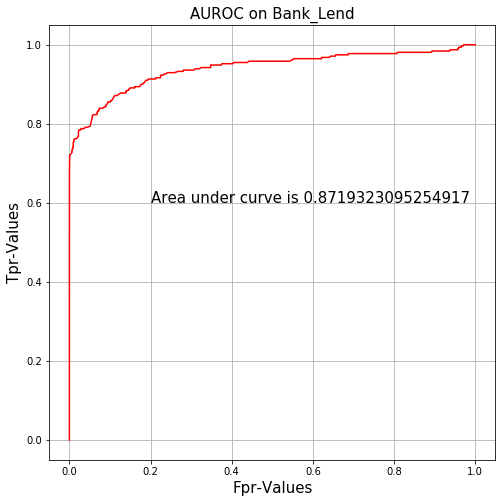

In [155]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


#### LOGISTIC REGRESSION

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
lm=LogisticRegression(penalty='l1',solver='liblinear',
    C=1.0,
    random_state=0,
    max_iter=150,
    multi_class='auto',
     )

In [114]:
lm.fit(top_train_x,train_y)

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(max_iter=150, penalty='l1', random_state=0,
                   solver='liblinear')

In [115]:
pred_lm=lm.predict(top_test_x)

In [116]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [117]:
tab=confusion_matrix(test_y,pred_lm)
print(tab)

[[256677      3]
 [    93    218]]


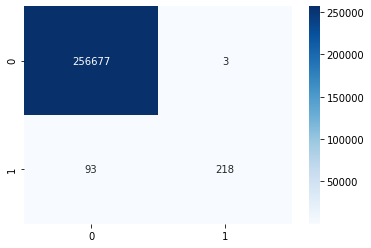

In [118]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [119]:
print(classification_report(test_y,pred_lm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.99      0.70      0.82       311

    accuracy                           1.00    256991
   macro avg       0.99      0.85      0.91    256991
weighted avg       1.00      1.00      1.00    256991



In [120]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

99.99883122954651
70.09646302250803
99.96378081551583
98.64253393665159
99.96264460623135


In [121]:
pred_prob_lm=lm.predict_proba(top_test_x)

In [122]:
pred_prob_lm=pd.DataFrame(pred_prob_lm)

In [123]:
roc_auc = roc_auc_score(test_y,pred_lm)
roc_auc


0.8504764712602728

In [124]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_prob_lm.iloc[:,1] )



In [125]:
fpr, tpr, threshold

(array([0.00000000e+00, 7.79180302e-06, 7.79180302e-06, 1.16877045e-05,
        1.16877045e-05, 1.94795076e-04, 1.94795076e-04, 2.36091632e-03,
        2.36091632e-03, 2.73570204e-02, 2.73570204e-02, 5.53724482e-02,
        5.53724482e-02, 7.06521739e-02, 7.06521739e-02, 7.07339878e-02,
        7.07339878e-02, 7.51480443e-02, 7.51480443e-02, 8.39956366e-02,
        8.39956366e-02, 1.08711236e-01, 1.08711236e-01, 1.19035375e-01,
        1.19035375e-01, 1.29024466e-01, 1.29024466e-01, 1.80076360e-01,
        1.80076360e-01, 2.03950444e-01, 2.03950444e-01, 2.20040517e-01,
        2.20040517e-01, 2.60078697e-01, 2.60078697e-01, 2.65151161e-01,
        2.65151161e-01, 2.74707807e-01, 2.74707807e-01, 2.75058439e-01,
        2.75058439e-01, 2.77107683e-01, 2.77107683e-01, 2.84708587e-01,
        2.84708587e-01, 2.97397538e-01, 2.97397538e-01, 3.39071996e-01,
        3.39071996e-01, 3.46026180e-01, 3.46026180e-01, 3.55029609e-01,
        3.55029609e-01, 4.59747546e-01, 4.59747546e-01, 4.640369

Text(0.2, 0.6, 'Area under curve is 0.8504764712602728')

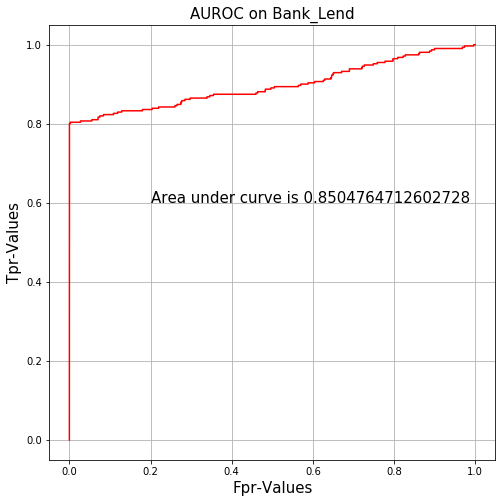

In [126]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


In [127]:
lm1=LogisticRegression(penalty='l2',solver='liblinear',
    C=1.0,
    random_state=0,
    max_iter=150,
    multi_class='auto',
     )

In [128]:
lm1.fit(top_train_x,train_y)

LogisticRegression(max_iter=150, random_state=0, solver='liblinear')

In [129]:
pred1_lm=lm1.predict(top_test_x)

In [130]:
tab=confusion_matrix(test_y,pred1_lm)
print(tab)

[[256638     42]
 [    63    248]]


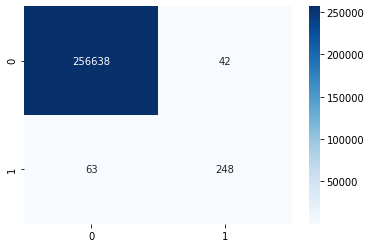

In [131]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [132]:
print(classification_report(test_y,pred1_lm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.86      0.80      0.83       311

    accuracy                           1.00    256991
   macro avg       0.93      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991



In [133]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

99.98363721365125
79.7427652733119
99.9754578283684
85.51724137931035
99.95914253806554


In [134]:
pred1_prob_lm=lm1.predict_proba(top_test_x)

In [135]:
pred1_prob_lm=pd.DataFrame(pred1_prob_lm)

In [136]:
roc_auc = roc_auc_score(test_y,pred1_lm)
roc_auc


0.8986320124348157

In [137]:
fpr, tpr, threshold = roc_curve( test_y ,  pred1_prob_lm.iloc[:,1] )



In [138]:
fpr, tpr, threshold

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.89590151e-06,
        3.89590151e-06, 1.16877045e-05, 1.16877045e-05, 2.72713106e-05,
        2.72713106e-05, 4.59716378e-04, 4.59716378e-04, 4.26990806e-03,
        4.26990806e-03, 6.92301699e-03, 6.92301699e-03, 3.06334736e-02,
        3.06334736e-02, 3.78408914e-02, 3.78408914e-02, 5.21544335e-02,
        5.21544335e-02, 1.05376344e-01, 1.05376344e-01, 1.05820477e-01,
        1.05820477e-01, 1.14114851e-01, 1.14114851e-01, 1.15275830e-01,
        1.15275830e-01, 1.20285959e-01, 1.20285959e-01, 1.26757052e-01,
        1.26757052e-01, 1.31373695e-01, 1.31373695e-01, 1.53443977e-01,
        1.53443977e-01, 1.63261649e-01, 1.63261649e-01, 1.68973040e-01,
        1.68973040e-01, 1.75576593e-01, 1.75576593e-01, 2.09209911e-01,
        2.09209911e-01, 2.34934549e-01, 2.34934549e-01, 2.37934393e-01,
        2.37934393e-01, 2.47646875e-01, 2.47646875e-01, 2.884057

Text(0.2, 0.6, 'Area under curve is 0.8986320124348157')

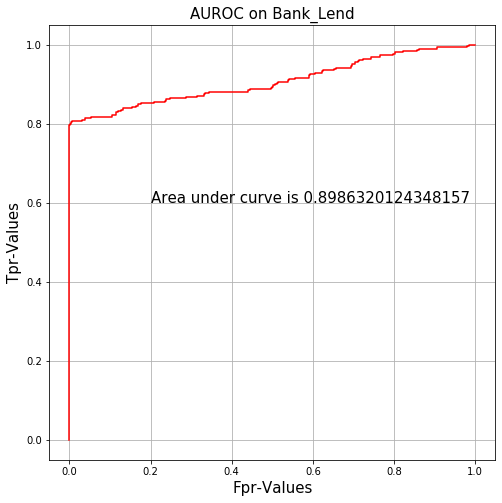

In [139]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


In [56]:
# Chosing only imp features for tis model

In [140]:
lm2=LogisticRegression(penalty='l2',solver='liblinear',
    C=1.0,
    random_state=0,
    max_iter=150,
    multi_class='auto',
     )

In [141]:
lm2.fit(train_x_bl,train_y_bl)

NameError: name 'train_x_bl' is not defined

In [281]:
pred2_lm=lm2.predict(top_test_x)

In [282]:
tab=confusion_matrix(test_y,pred2_lm)
print(tab)

[[256597     83]
 [    63    248]]


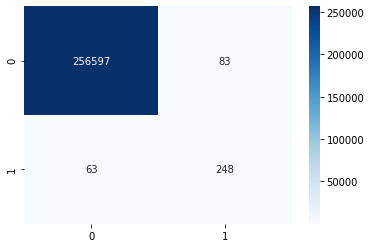

In [283]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [284]:
print(classification_report(test_y,pred2_lm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.75      0.80      0.77       311

    accuracy                           1.00    256991
   macro avg       0.87      0.90      0.89    256991
weighted avg       1.00      1.00      1.00    256991



In [285]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

99.96766401745364
79.7427652733119
99.97545390789371
74.92447129909365
99.94318867197684


In [286]:
pred2_prob_lm=lm2.predict_proba(top_test_x)

In [287]:
pred2_prob_lm=pd.DataFrame(pred2_prob_lm)

In [288]:
roc_auc = roc_auc_score(test_y,pred2_lm)
roc_auc


0.8985521464538276

In [289]:
fpr, tpr, threshold = roc_curve( test_y ,  pred2_lm )



In [290]:
fpr, tpr, threshold

(array([0.00000000e+00, 3.23359825e-04, 1.00000000e+00]),
 array([0.        , 0.79742765, 1.        ]),
 array([2, 1, 0], dtype=int64))

Text(0.2, 0.6, 'Area under curve is 0.8985521464538276')

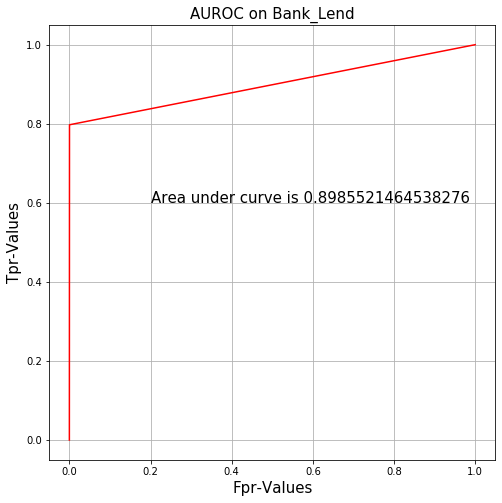

In [291]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)
